<a href="https://colab.research.google.com/github/emmacampo/CC_User_Churn_Prediction/blob/main/cc_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.exceptions import FitFailedWarning

# Suppress FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# to split the data into train and test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats
# To get diferent metric scores
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    make_scorer,
    f1_score
)
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/BankChurners.csv")

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [ ]:
data.shape

(10127, 21)

We are working with 10127 rows and 21 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

10 integer, 6 object and 5 float datatypes in this dataset

In [ ]:
# checking for duplicate values in the data
data.duplicated().sum()

0

No duplicates found

In [ ]:
df = data.copy()

Making a copy

In [ ]:
#let's check for missing values
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

We have 1519 missing values in the Education_Level column and 749 missing values in the Marital_Status column. This will be treated down the track.

In [ ]:
# dropping the ID column
df = df.drop(["CLIENTNUM"], axis=1)

Dropping 'CLENTNUM' since it won't provide any insight or importance for my models.

In [ ]:
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)

To better understand the relationship between our target variable and independent variables, I am replacing the strings with integer values.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.0,0.160660,0.367235,0.0,0.000,0.000,0.000,1.000
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000


**The mean customer** is 46, with 2 dependants, has been on the books for 36 months, has almost 4 products with Thera Bank, but has been inactive for 1 month in the past 12 months, and only 1 contact point in the past 12 months. Credit limit has a mean of 9088, total revolving balance of 814, average open to buy in the past 12 months is 9090. Total transaction amount in the past 12 months is 3387, 24 transactions and utilizing 0.27 of available funds.

**Outliers** can be seen in the Credit Limit, Average open to buy and Total Transaction Amount. We will explore this further during the EDA.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

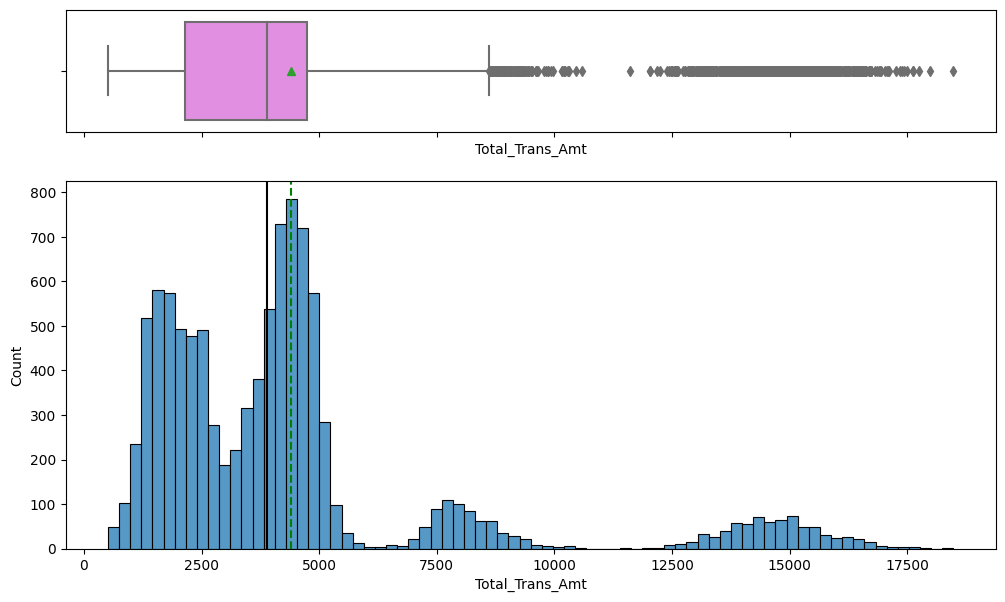

In [ ]:
histogram_boxplot(df,'Total_Trans_Amt')

Total_Trans_Amt is right-skewed, with a noticable outlier congregation between 8000-175 000. The median lies in the 4000 zone, and majority are between 1000-5000. While we do observe outliers in the 8-175k range, it's worth noting that the majority of the annual total transaction amount does not suggest a significant profit for the banks, since the peaks fall within the range of 1000 to 5000 annually.

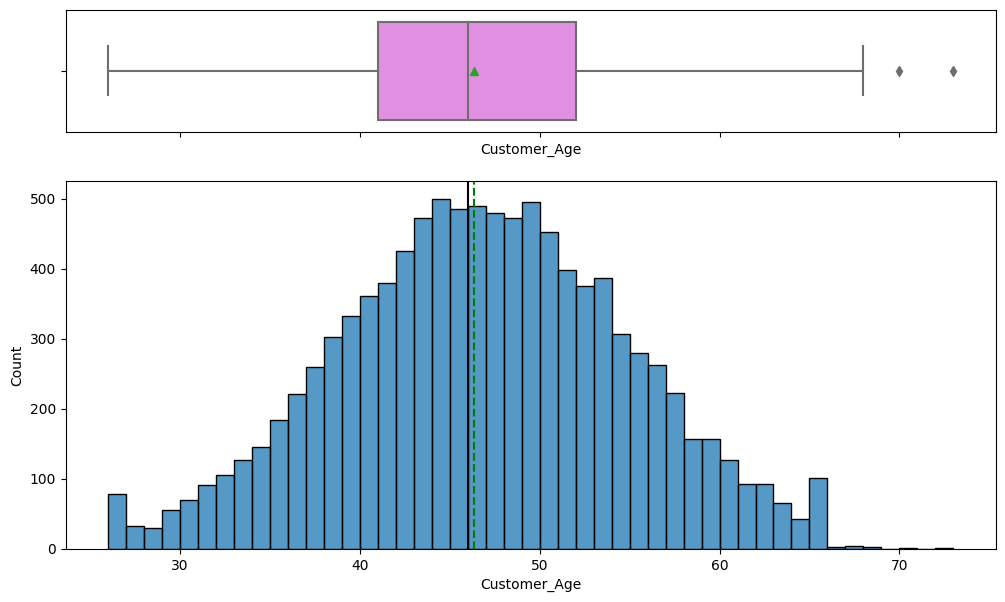

In [ ]:
histogram_boxplot(df,'Customer_Age')

We have a symmetrical distribution in this variable. The age variable appears to range between 18-65.

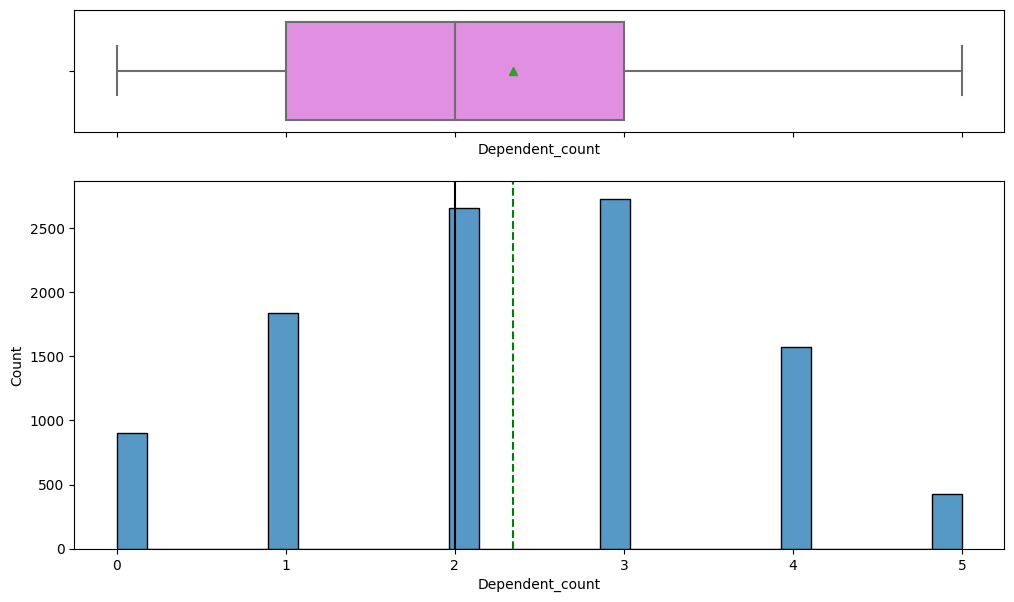

In [ ]:
histogram_boxplot(df,'Dependent_count')

Approximately 2,500 clients have two dependents, and an additional 2,500 clients have three dependents

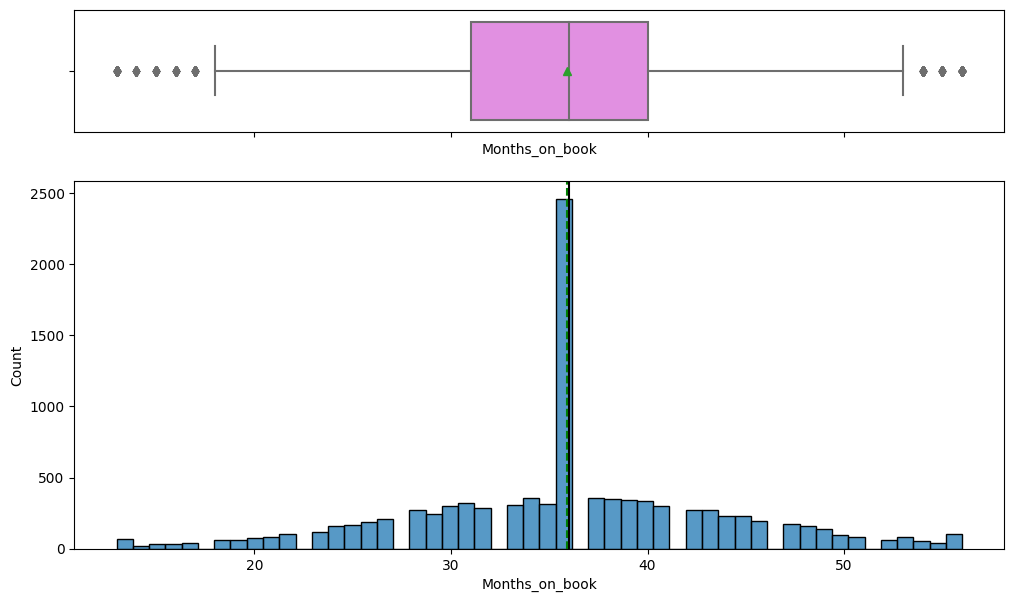

In [ ]:
histogram_boxplot(df,'Months_on_book')

We can observe a prominent peak around the 35-month mark. It will be intriguing to investigate if there is a correlation with another variable at this point. Evidently, a significant event occurred during that period to attract more customers

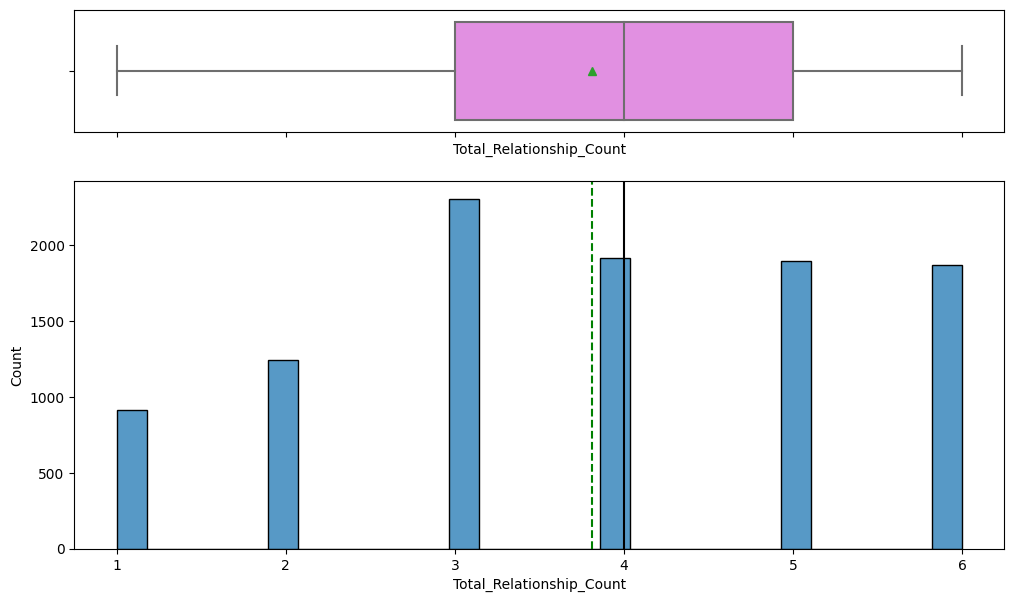

In [ ]:
histogram_boxplot(df,'Total_Relationship_Count')

A client holds anywhere between 1-6 products with the bank, but majority have 3 and above. This might suggest that debit and savings accounts are some other products/services offered by the bank. Optimistically, this could also indicate that clients are otherwise satisfied with the services and products offered.

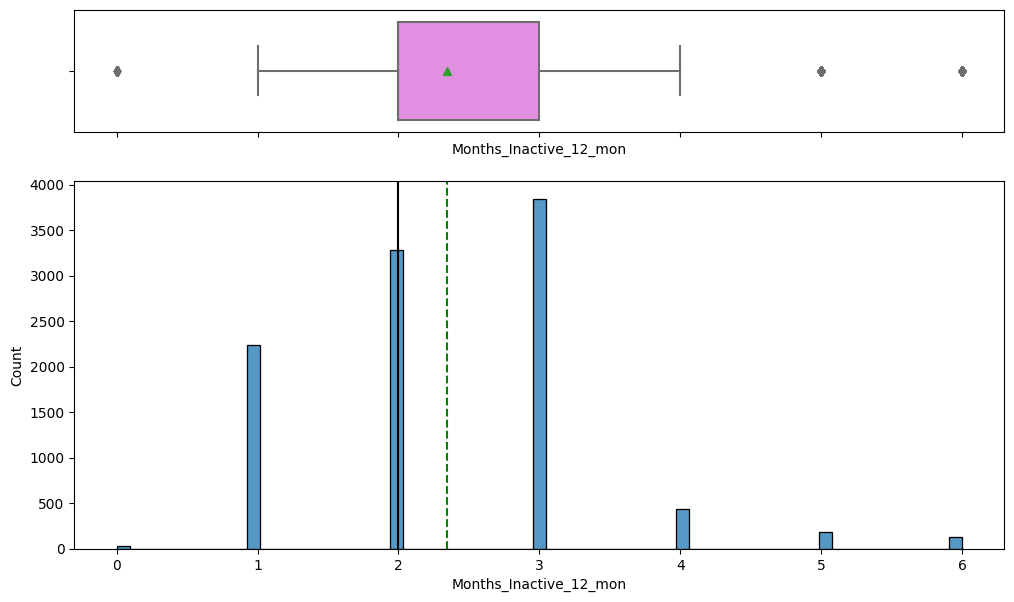

In [ ]:
histogram_boxplot(df,'Months_Inactive_12_mon')

The majority of clients have experienced inactivity for a period of 1-3 months in the past 12 months, with the median hovering just above 2 months. This inactivity level may potentially be correlated with customer churn and warrants further investigation

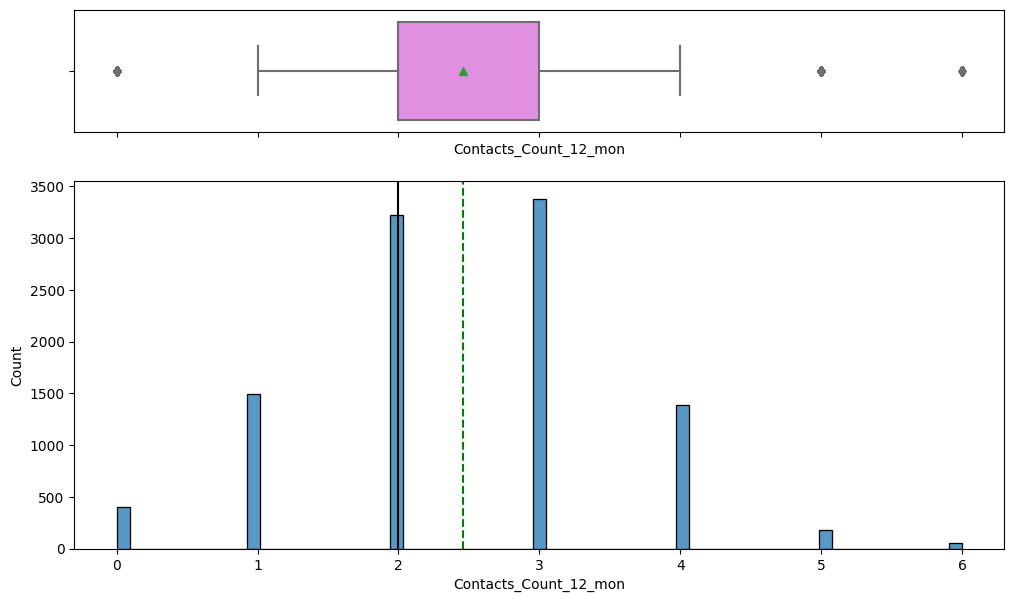

In [ ]:
histogram_boxplot(df,'Contacts_Count_12_mon')

The median contact count is 2.5, with just a few outliers at 0, 5 and 6, respectively.

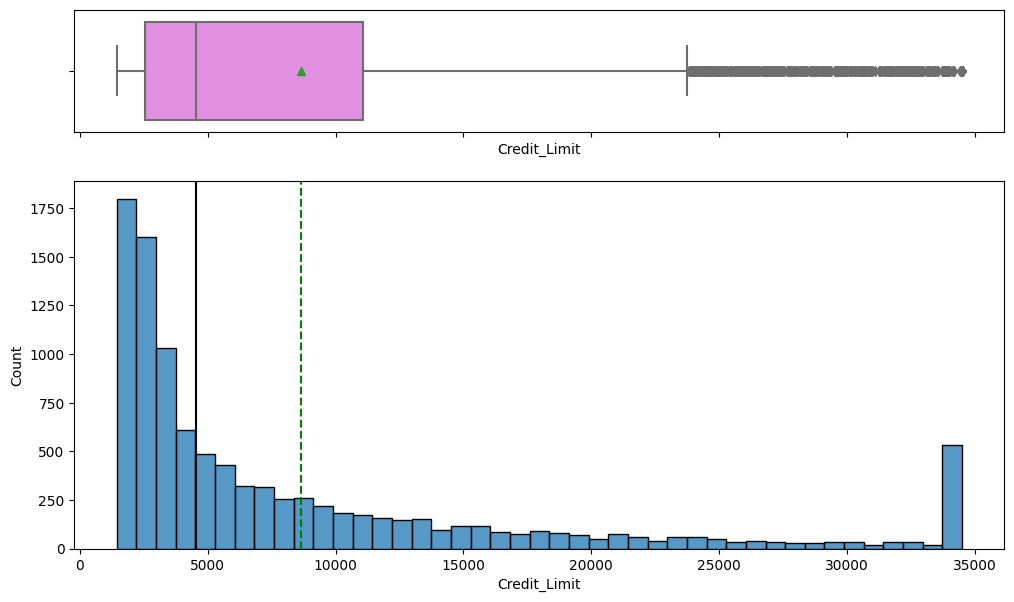

In [ ]:
histogram_boxplot(df,'Credit_Limit')

This variable is skewed to the right. We can see outliers ranging from 25000-35000. A trend in the 500-5000 range is evident based on the above graph. Most clients therefore spend less than 5000.

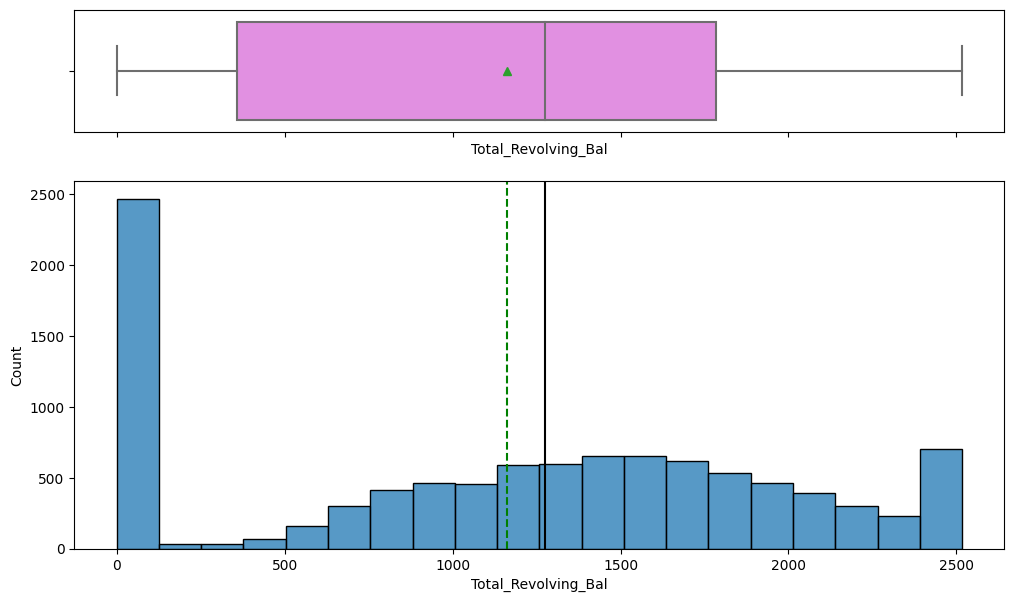

In [ ]:
histogram_boxplot(df,'Total_Revolving_Bal')

It's noteworthy that 2,500 clients maintain a zero revolving balance on their accounts. However, we also observe a significant trend with balances ranging from 500 to 2,500. While this benefits the bank financially, it raises the possibility of clients churning once their outstanding balances are paid to avoid fees and interest. Another potential explanation could be that clients are utilizing multiple credit cards from different banks, opting for the account with the lowest available interest rates and fees.

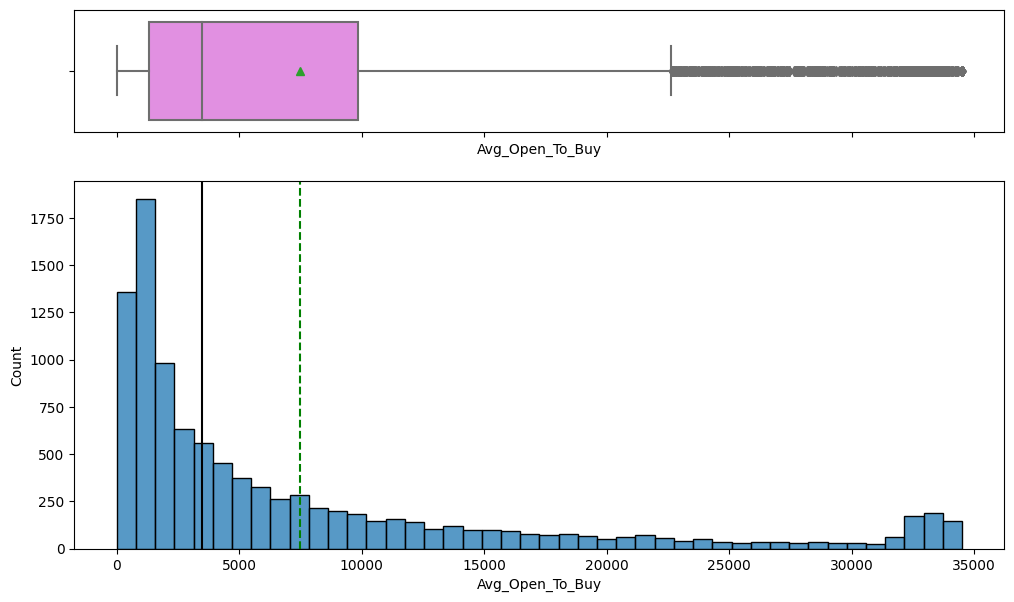

In [ ]:
histogram_boxplot(df,'Avg_Open_To_Buy')

Here is another right-skewed graph showing us outliers in the 25000-35000 range (just like the Credit_Limit variable). Clients may not be utilizing their credit cards as much as we'd like them to.

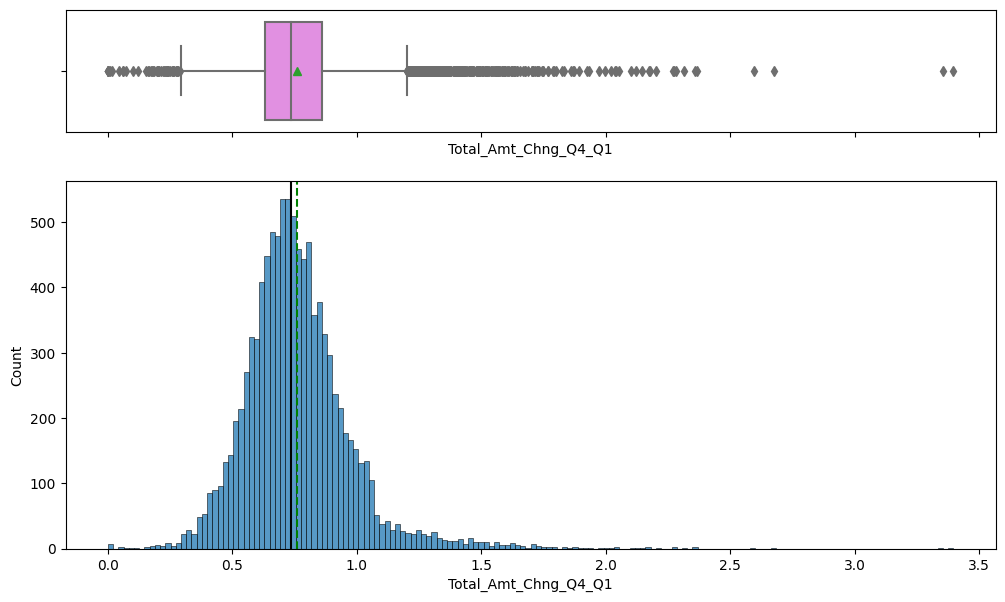

In [ ]:
histogram_boxplot(df,'Total_Amt_Chng_Q4_Q1')

There has been a clear change of total amount between Q4 and Q1

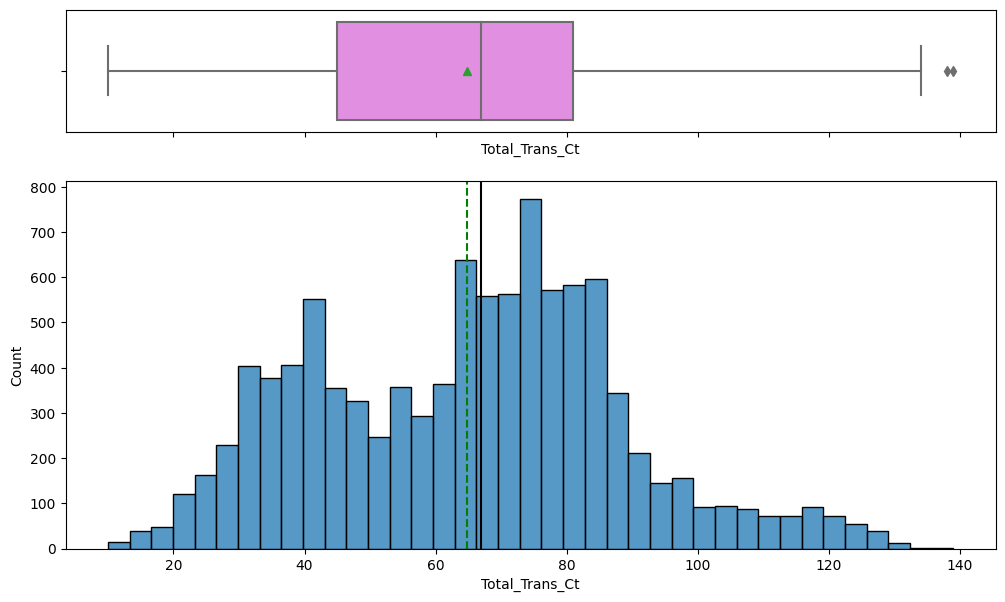

In [ ]:
histogram_boxplot(df,'Total_Trans_Ct')

The most frequent value is around 75, and the range is 10-135 suggesting a wide range of user behavior with their credit card use.

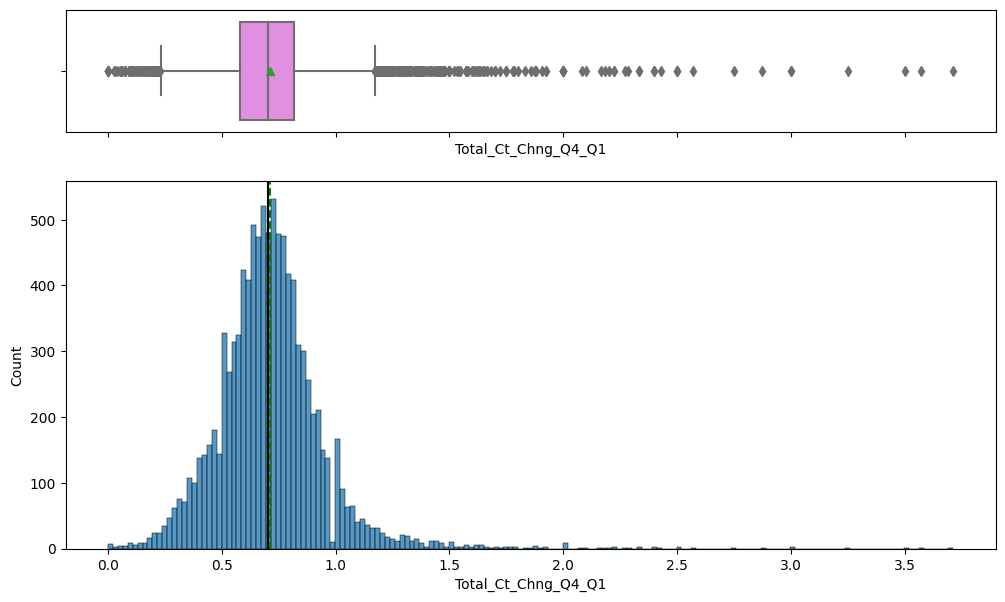

In [ ]:
histogram_boxplot(df,'Total_Ct_Chng_Q4_Q1')

This column is right-skewed with plentiful of outliers in the 1.25-3.5 range. The median lies at approx 0.7.

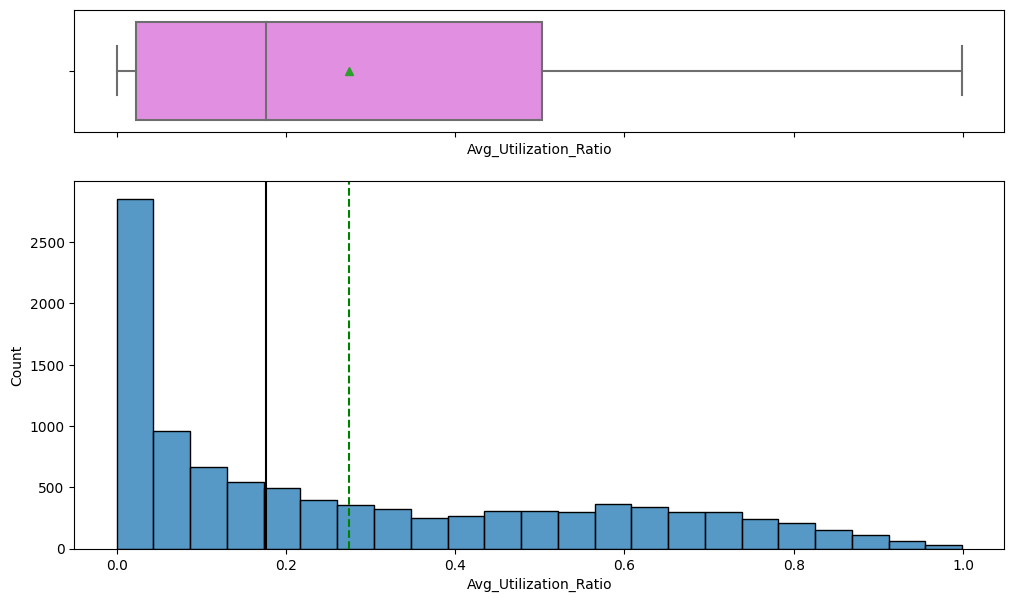

In [ ]:
histogram_boxplot(df,'Avg_Utilization_Ratio')

The majority of customers are only utilizing up to 0.2:1 of the available credit, on average. This is suggesting that customers may have a reason to not be utlizing the credit (high rates, better alternatives, ineffective market segmentation).

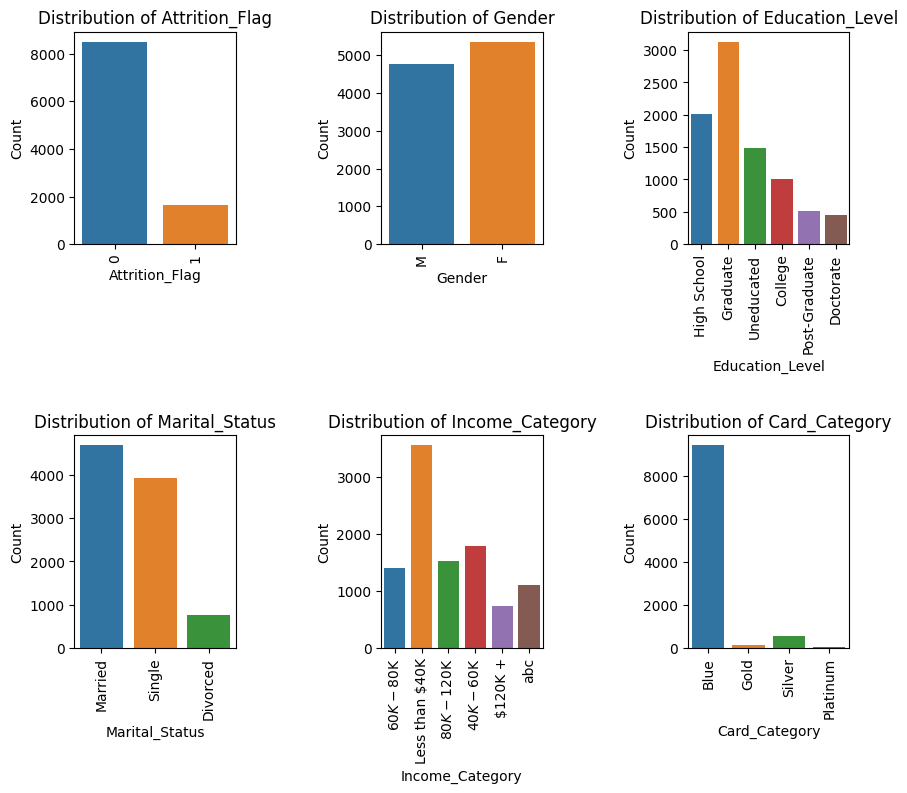

In [ ]:
data_to_explore = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
plt.subplots_adjust(wspace=0.9, hspace=0.9)
axes = axes.flatten()
# Creating count plots for variables in data_to_explore
for i, variable in enumerate(data_to_explore):
    sns.countplot(data=df, x=variable, ax=axes[i])
    axes[i].set_title(f'Distribution of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

We can summarize the above graphs with the following statements:


*   Approx 1/5 of the client base are attrited customers
*   There is a slight difference between gender distribution
*   Majority of clients are graduates, followed by high school students
*   Approx 4500 customers are married, 3900 are single and 500 are divorced.
*   Approx 8700 customers are utilizing the Blue Card





**Bivariate Analysis**

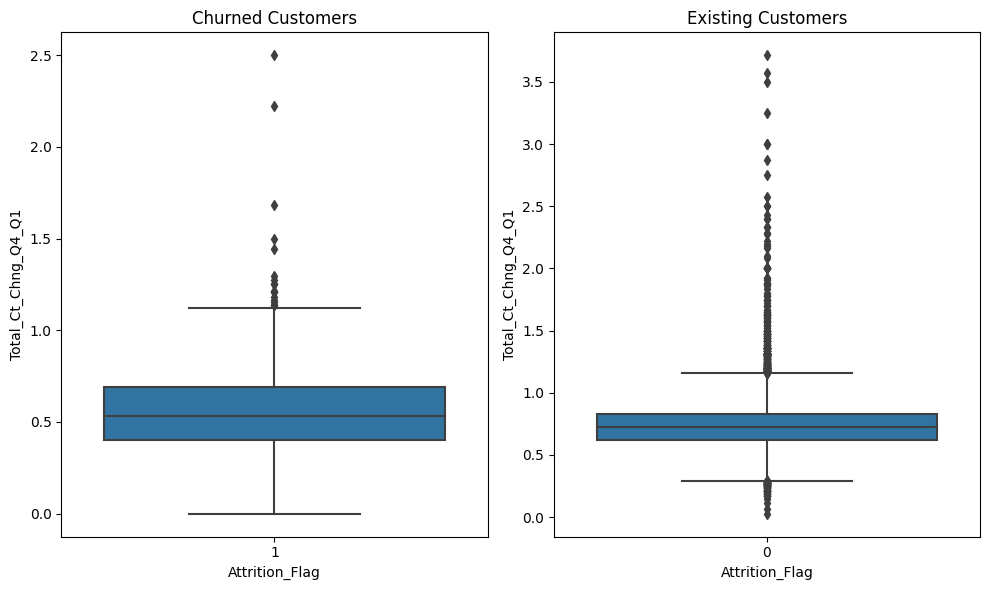

In [ ]:
#Creating side-by-side box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df[df['Attrition_Flag'] == 1])
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df[df['Attrition_Flag'] == 0])
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

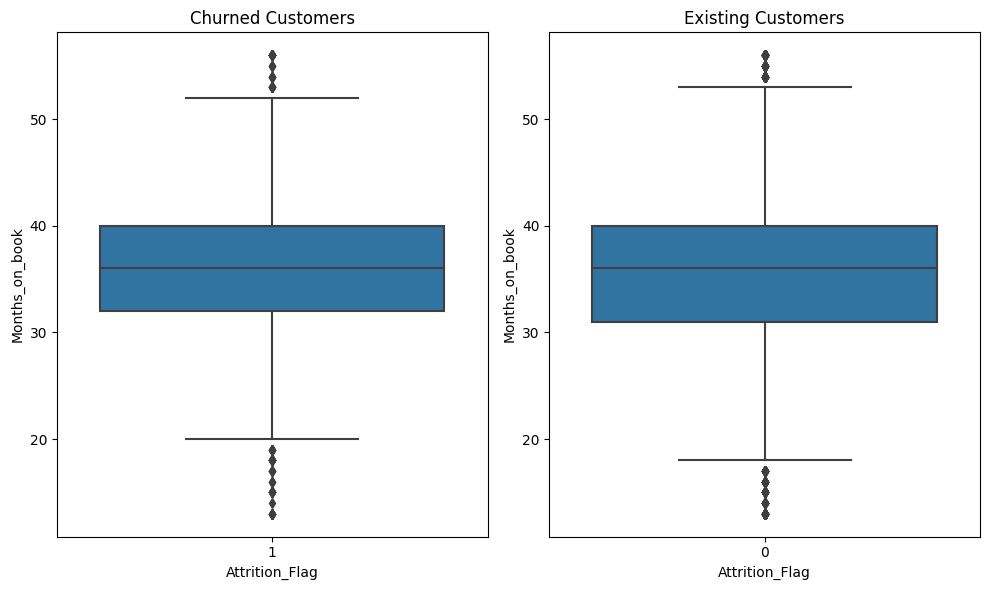

In [ ]:
#Creating side-by-side box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df[df['Attrition_Flag'] == 1])
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df[df['Attrition_Flag'] == 0])
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

We don't see anything significant with this variable.

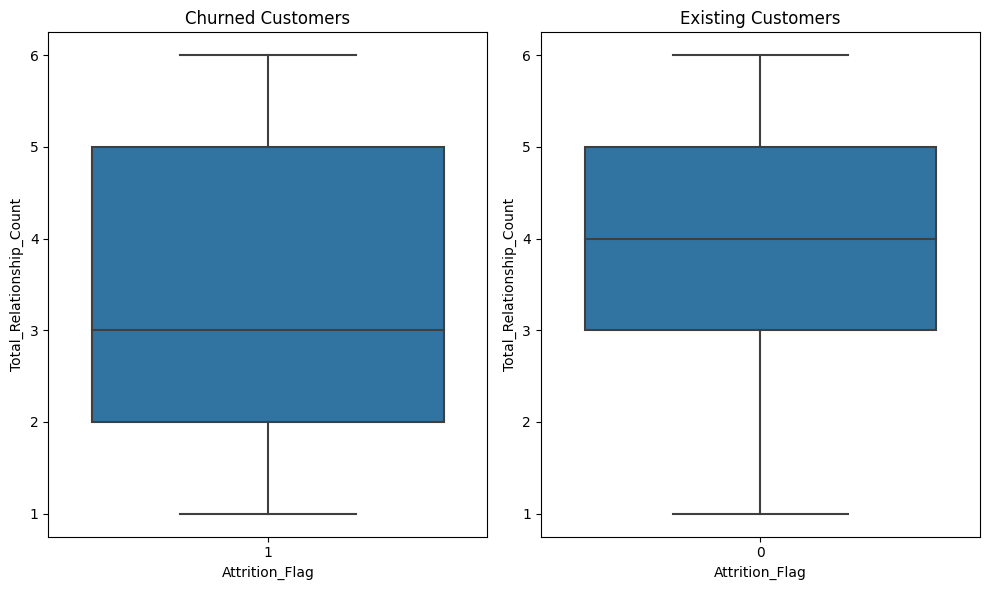

In [ ]:
#Creating side-by-side box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df[df['Attrition_Flag'] == 1])
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df[df['Attrition_Flag'] == 0])
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

The interquartile range is different here. The median amount of products for a churned customer is 3, whereas an existing custoner has an interquartile range of 4. Perhaps customers that utilize more services and products with Thera Bank will be more likely to accept credit card offerings.

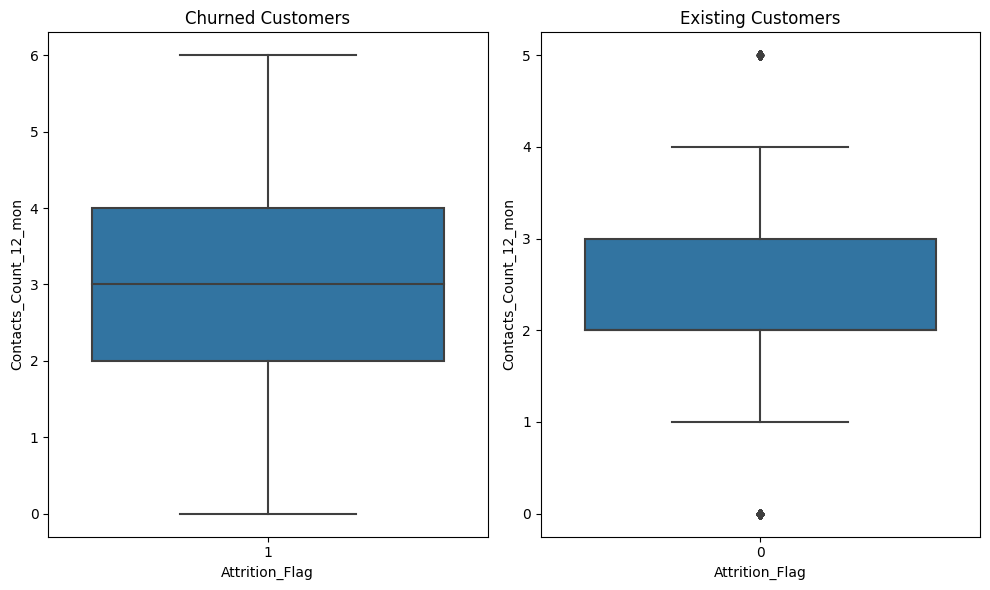

In [ ]:
#Creating side-by-side box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=df[df['Attrition_Flag'] == 1])
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition_Flag', y='Contacts_Count_12_mon', data=df[df['Attrition_Flag'] == 0])
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

Churned Customers will have anywhere between 0-6 contact points with the bank in the past 12 months, with the IQR at 3.

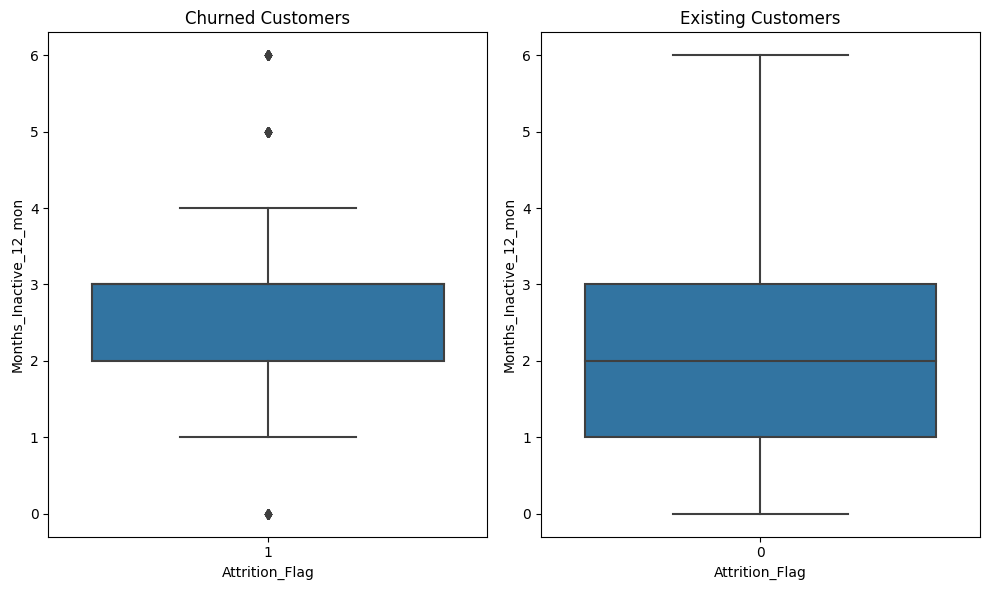

In [ ]:
churned = df[df['Attrition_Flag'] == 1]
existing = df[df['Attrition_Flag'] == 0]

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=churned)
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition_Flag', y='Months_Inactive_12_mon', data=existing)
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

Inactivity between 1-4 months could potentially contribute to attrition. The difference in distribution between the two categories is evident from the above boxplot. Existing customers are, however, also inactive, but the range lies between 0-6 months, with the median hovering at 2 months. Inactivity surpassing a month is not ideal for the bank.

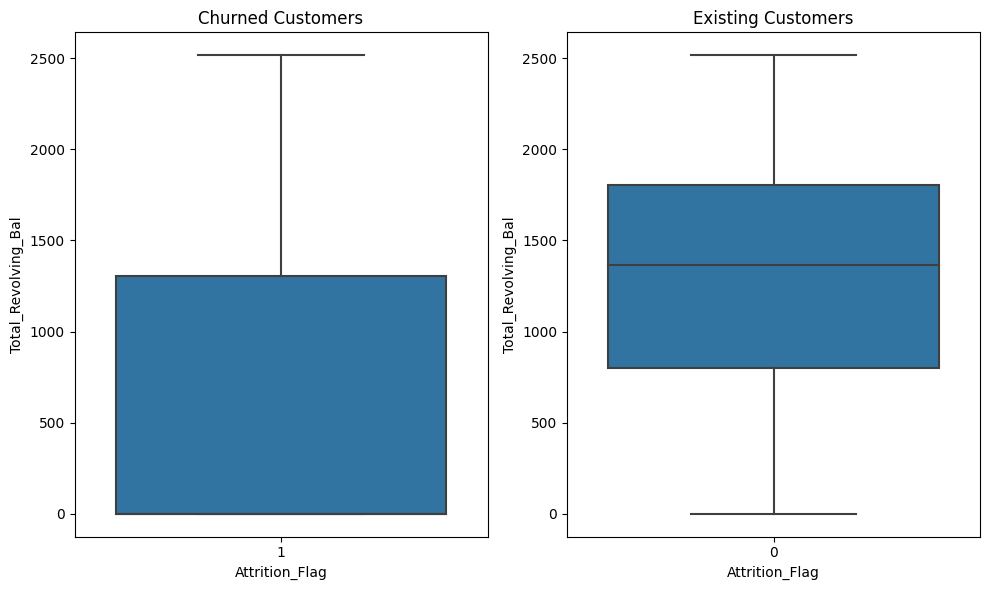

In [ ]:
churned = df[df['Attrition_Flag'] == 1]
existing = df[df['Attrition_Flag'] == 0]

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=churned)
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=existing)
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

Customers who have churned typically maintain a smaller outstanding balance compared to their existing counterparts. It's possible that attrited customers frequently made excessive use of their credit cards, incurring substantial fees and other discouraging factors, which may have led to their decision to discontinue their credit card usage.

In [ ]:
#taking a closer look at the income column and using the groupby function
income_grouped = df.groupby(['Attrition_Flag', 'Income_Category']).size().unstack(fill_value=0)
print(income_grouped)

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                     
0                    601         1519         1213          1293   
1                    126          271          189           242   

Income_Category  Less than $40K  abc  
Attrition_Flag                        
0                          2949  925  
1                           612  187  


Although we will address the "abc" value later, there is still valuable information available. Specifically, there are 3561 customers in the 'Less than $40k' income category, followed by 1790 customers in the '40k-60k' category. Within the most frequent income category, 612 customers experienced attrition, while the second most frequent income category had 271 customers in the attrited category. We will thoroughly investigate and handle the "abc" value after the Exploratory Data Analysis (EDA) phase. This column offers intriguing insights into the attributes of attrited customers.

In [ ]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

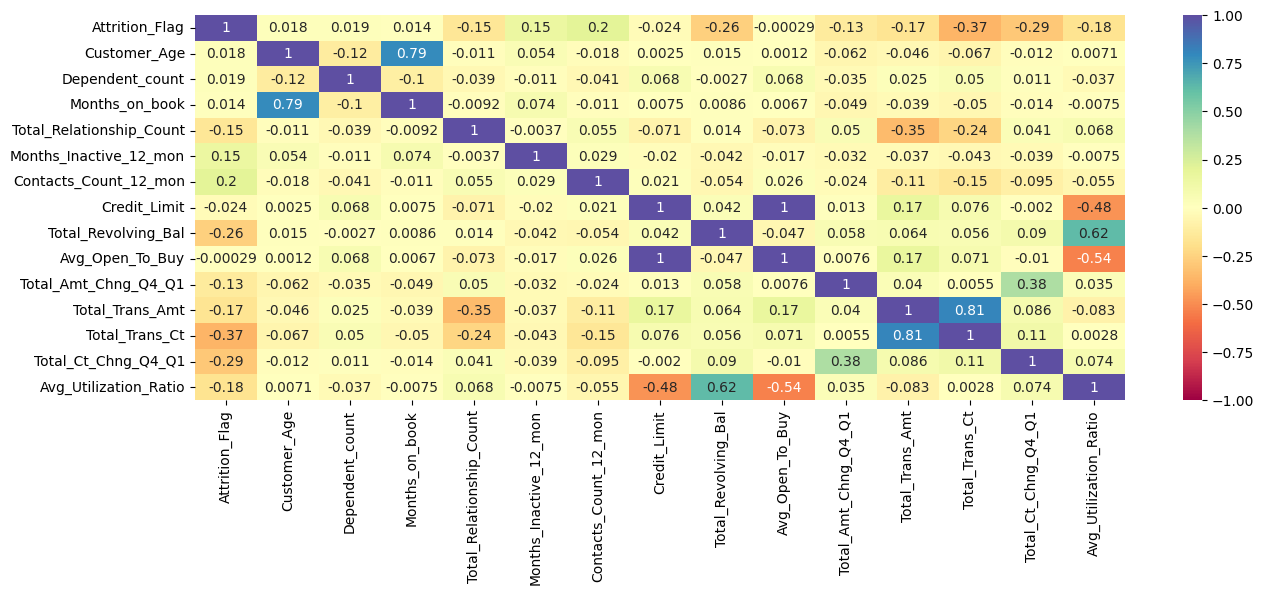

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral', vmin=-1, vmax=1);
plt.show()



*   In terms of our target variable, there is a slight negative correlation between 'Attrition_Flag' and 'Total_Trans_Amt', suggesting that less transactions can be an attribute for an attrited customer.
*   'Credit_Limit' and 'Avg_Open_To_Buy' are 100% correlated, indicating that we need to drop one of these columns for our model.
*   Another noteworthy takeaway from the heatmap is the correlation between 'Customer_Age' and 'Months_on_book'. The higher the age, the higher the amount of months on book.
*   There is also a positive correlation between the 'Total_Revolving_Balance' variable and 'Avg_Utilization_Ratio', suggesting that a higher revolving balance (the outstanding balance on the credit card) can also indicate a higher amount of credit spent by the customer.
*   'Credit_Limit' also has a correlation with the'Avg_Utilization_Ratio' variable, suggesting that a customer that spends a higher amount of credit may also have a higher credit limit.
*   It is no surprise that the 'Avg_Open_To_Buy' variable and 'Avg_Utilization_Ratio' are negatively correlated. The more credit used, the less credit will sebsequently be available.
*   'Total_Trans_Amt' and 'Total_Trans_Ct' is unsurprisingly correlated.


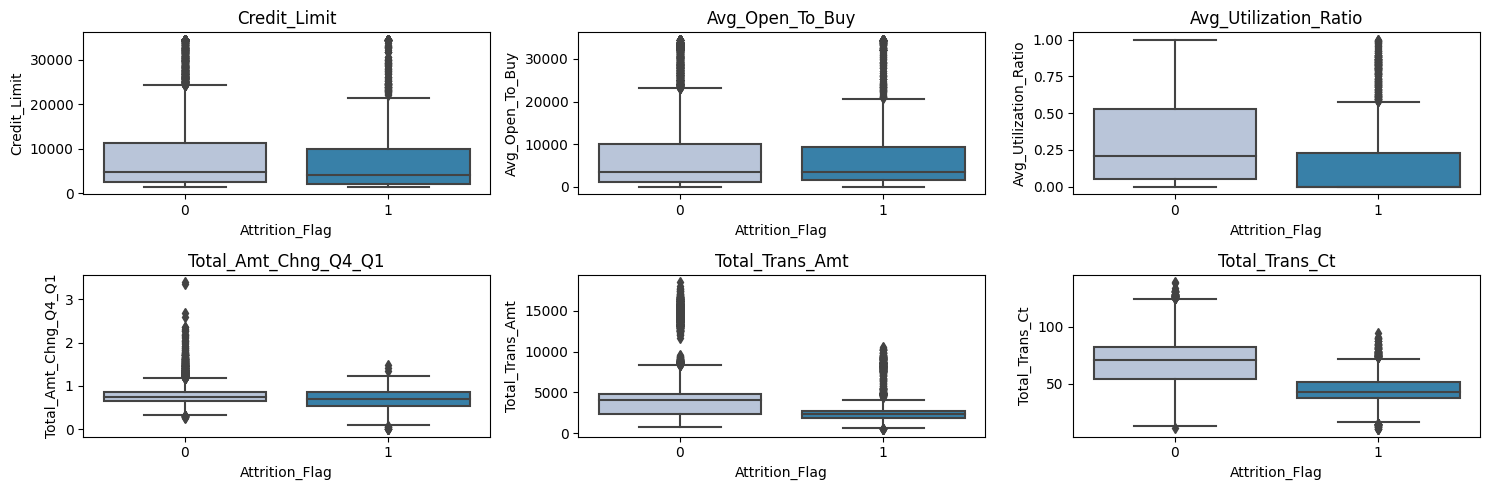

In [ ]:
cols = ['Credit_Limit', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct']

plt.figure(figsize=(15, 5))

for i, variable in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='Attrition_Flag', y=variable, palette="PuBu")
    plt.title(variable)
    plt.ylabel(variable)

plt.tight_layout()
plt.show()

*   Just as the heatmap clearly displayed, 'Credit_Limit' and 'Avg_Open_To_Buy' have an almost identical distribution, with next to undistinguishable interquartile range. We can infer that if the customer has one of these attributes, the other will almost certainly have a similar value.
*   'Avg_Utilization_Ratio' is distributed differently, with a noteworthy amount of outliers detected for 'Attrited Customers'. Existing customers utilize anywhere between 0-100%, whereas attrited customers tend to utilize between 0-55%, with outliers ranging up to 100%.
*   Total Transaction amount and count is also less for churned customers.





Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


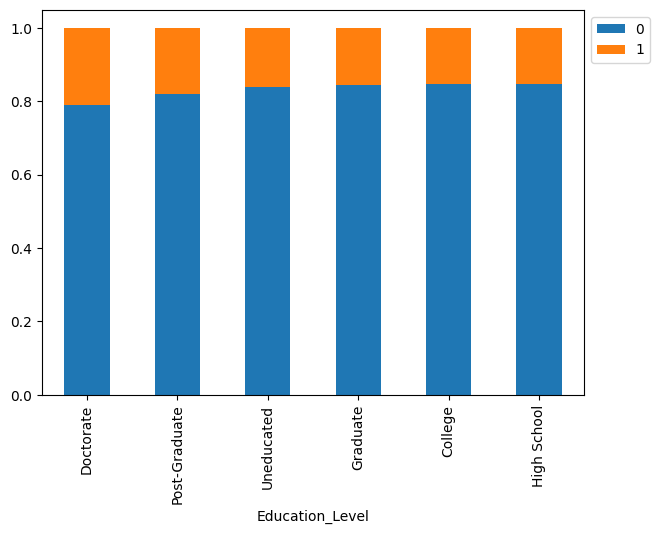

In [ ]:
stacked_barplot(df, 'Education_Level', 'Attrition_Flag')

While 3128 of the customers are graduates, a staggering 487 of these customers have attrited, followed by 306 of High School Students (out of 2013) and 237 in the uneducated category (out of 1487). Perhaps these attributes are playing an important role in the decision making process to attrite.

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


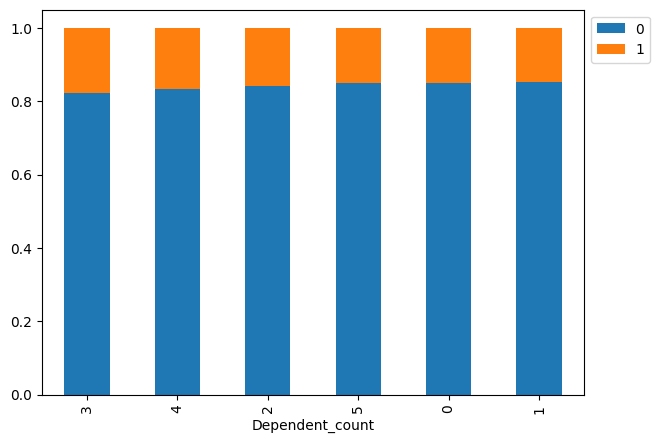

In [ ]:
stacked_barplot(df, 'Dependent_count', 'Attrition_Flag')

Having 1-4 dependents can also be contributing to attrition. This suggests that families with children are making the decision to cancel their credit card account with the bank. We can also infer that a portion of the 0 dependent category may include high school students.

In [ ]:
Top_Age = df['Customer_Age'].value_counts().head(10).index.tolist()

age_counts = (
    df[df['Customer_Age'].isin(Top_Age)]
    .groupby(['Customer_Age', 'Attrition_Flag'])
    .size()
    .unstack(fill_value=0)
)

print(age_counts)

Attrition_Flag    0   1
Customer_Age           
42              364  62
43              388  85
44              416  84
45              407  79
46              408  82
47              403  76
48              387  85
49              416  79
50              381  71
51              340  58


The top 10 age ranges from 42 to 51 provide us with a distinct perspective on the demographic characteristics of attrited customers. If the majority of these customers are graduates with an annual salary ranging from 40k to 60k, and fall within this particular age range, it suggests that the bank's product and service offerings may not align with the values and economic circumstances of their customer base, particularly those with family responsibilities.

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


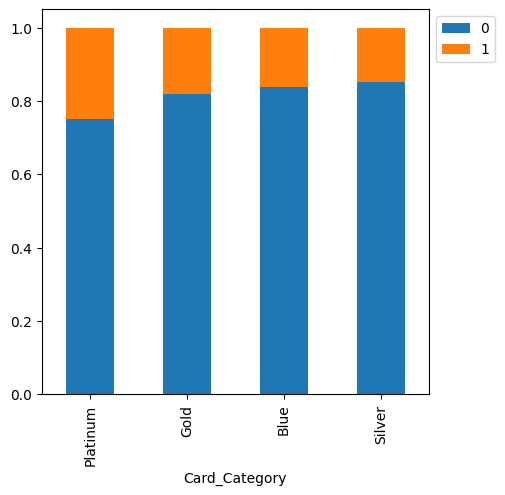

In [ ]:
stacked_barplot(df, 'Card_Category', 'Attrition_Flag')
plt.show()

Their client base are mainly in the 'Blue' category, and out of the 20 customers who have a Platinum Credit Card, 5 have attrited. The bank does not appear to retain the customers with Silver, Gold and Platinum accounts which are the most lucrative for a bank. They should consider competitor analysis in these categories to gain a better understanding about their shortfalls. A cost-benefit analysis of retaining Blue Credit Card holders vs the other 3 categories would also be useful for strategic planning.

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


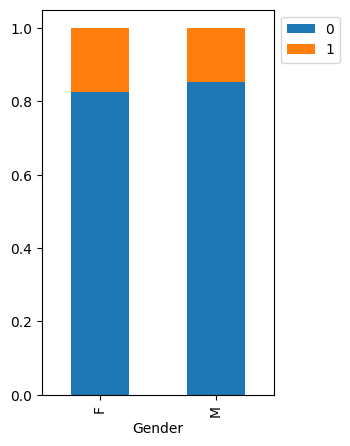

In [ ]:
stacked_barplot(df, 'Gender', 'Attrition_Flag')

Gender may not be a contributing factor for our target variable, as there is a slight total discrepancy between male and female customers both in total, existing customers and attrited customers.

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


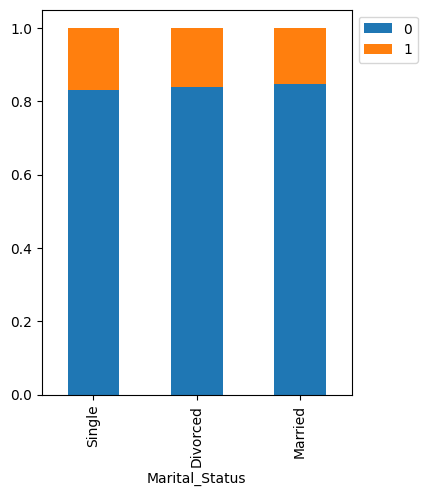

In [ ]:
stacked_barplot(df, 'Marital_Status', 'Attrition_Flag')

**Questions**:

1. How is the total transaction amount distributed?

Although outliers are present within the 10-175k range, it's important to highlight that the majority of the total annual transaction amounts do not indicate substantial profits for the banks. This is evident as the predominant values cluster within the annual range of 1000 to 5000.

2. What is the distribution of the level of education of customers?

Graduate is the most frequent attribute (approx 3000), followed by High School (2000), Uneducated (1500), College (1000), Post-Graduate (500) and Doctorate (450), respectively.

3. What is the distribution of the level of income of customers?

While we will postpone dealing with the "abc" value for now, it's important to note that valuable information remains available. Specifically, there are 3,561 customers in the 'Less than $40k' income category, with an additional 1,790 customers falling into the '40k-60k' category. In the most frequent income category, attrition was experienced by 612 customers, and the second most frequent income category saw 271 customers in the attrited category. This column provides intriguing insights into the characteristics of attrited customers.


4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

Interestingly, existing customers has a broader range. Outliers range between 0.025 and 1.2-3.7, while attrited customers have outliers in the 1.2-2.5 range. The distribution is generally in the 0-1.2 range. This could indicate that customers with a low change count between Q4 and Q1 may attrite.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

A lapse in activity spanning 1-4 months might play a role in attrition. But based on the EDA performed, it does not appear to play an essential role for the target variable. A distinct variation in the distribution between the two categories is noted. Existing customers also show instances of inactivity, but their range extends from 0 to 6 months, with the median standing at 2 months. Prolonged inactivity exceeding a month is not favorable for the bank.


6. What are the attributes that have a strong correlation with each other?

Regarding our target variable, we observe a slight negative correlation between 'Attrition_Flag' and 'Total_Trans_Amt,' indicating that fewer transactions might be indicative of an attrited customer.

'Credit_Limit' and 'Avg_Open_To_Buy' exhibit a perfect 100% correlation, necessitating the removal of one of these columns from our model.

Another noteworthy insight from the heatmap is the positive correlation between 'Customer_Age' and 'Months_on_book'—as customer age increases, the duration of their relationship with the bank also tends to increase.

A positive correlation emerges between the 'Total_Revolving_Balance' variable and 'Avg_Utilization_Ratio,' suggesting that a higher revolving balance on the credit card indicates greater credit utilization by the customer.

'Credit_Limit' also displays a correlation with 'Avg_Utilization_Ratio,' implying that customers who use more credit may have higher credit limits.

The expected negative correlation is observed between 'Avg_Open_To_Buy' and 'Avg_Utilization_Ratio.' As credit usage increases, the available credit diminishes.

Lastly, 'Total_Trans_Amt' and 'Total_Trans_Ct' unsurprisingly exhibit a positive correlation, indicating that as the total transaction amount increases, so does the total transaction count.

## Data Pre-processing

In [ ]:
X = df.drop(["Attrition_Flag", "Avg_Open_To_Buy"], axis=1)
y = df["Attrition_Flag"]

Dropping 'Attrition_Flag' and 'Avg_Open_To_Buy' (due to the strong correlation with 'Credit_Limit')

In [ ]:
class_distribution = df["Attrition_Flag"].value_counts()
print("Class Distribution in Original Attrition_Flag:")
print(class_distribution)

Class Distribution in Original Attrition_Flag:
0    8500
1    1627
Name: Attrition_Flag, dtype: int64


In [ ]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 18) (2026, 18) (2026, 18)


In [ ]:
class_distribution_temp = y_temp.value_counts()
print("Class Distribution in y_temp (After First Split):")
print(class_distribution_temp)

Class Distribution in y_temp (After First Split):
0    6799
1    1302
Name: Attrition_Flag, dtype: int64


## Missing value imputation




In [ ]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ['Education_Level', "Marital_Status"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In order to build the models, I am replacing the NaN values with the most frequent categories. Since our minority class is quite small in comparison to existing customers, the effect of this imputation on recall (our target metric) should not have a negative impact.

In [ ]:
df['Income_Category'] = df['Income_Category'].replace('abc', 'Less than $40K')

In [ ]:
df['Income_Category'].value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


## Model Building

### Model evaluation criterion

Key Objective: Minimize Attrition

My primary goal is to understand the characteristics that facilitate attrition. To achieve this objective, I must identify customer segments with the highest potential of renouncing their Credit Cards.

The Significance of Recall:

False Negatives (FN): These are customers who are actually likely to attrite but are incorrectly classified as not likely to attrite by the model. Reducing FN is crucial because failing to identify customers at risk of attrition can lead to loss of valuable customers.

True Positives (TP): These are customers who are correctly identified as likely to attrite by the model. Maximizing TP is essential because it means we are correctly identifying potential attrition cases, and the bank can take proactive measures to retain these customers.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    # Compute the metrics you want
    acc = accuracy_score(target, pred)  # Accuracy
    recall = recall_score(target, pred)  # Recall
    precision = precision_score(target, pred)  # Precision
    f1 = f1_score(target, pred)  # F1-score

    # Creating a DataFrame of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1]
        }
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

I am creating 5 models with original data- Bagging, Random Forest, GBM, Adaboost, dtree, respectively.

In [ ]:
# Create a list of model names and models
model_names = ["Bagging", "Random forest", "gbm_og", "ada_og", "dtree"]
models = [
    ("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)),
    ("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')),
    ("gbm_og", GradientBoostingClassifier(random_state=1)),
    ("ada_og", AdaBoostClassifier(random_state=1)),
    ("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced'))
]

# Training and evaluating performance
print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging: 0.9764344262295082
Random forest: 1.0
gbm_og: 0.8790983606557377
ada_og: 0.8534836065573771
dtree: 1.0

Validation Performance:



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging: 0.745398773006135
Random forest: 0.7392638036809815
gbm_og: 0.8588957055214724
ada_og: 0.8650306748466258
dtree: 0.8190184049079755


Based on the recall scores on the training and validation data, we can conclude that the Bagging, Random Forset and Decision Tree models are, in fact, overfitted. The score in our training set is optimistic, but the validation set is showing us a very different score. However, GBM and Adaboost are promosing, displaying similar scores on both sets.

For a better visual of the results, let's take a look at their respective confusion matrices.

Confusion Matrix for Bagging:


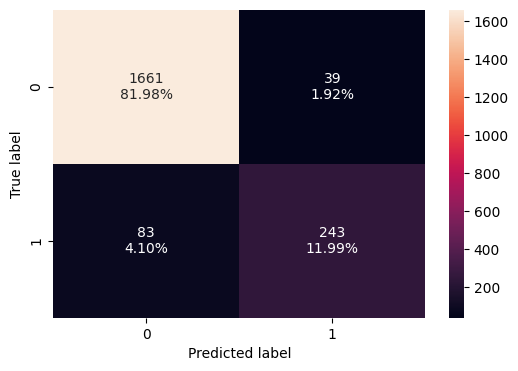

Confusion Matrix for Random forest:


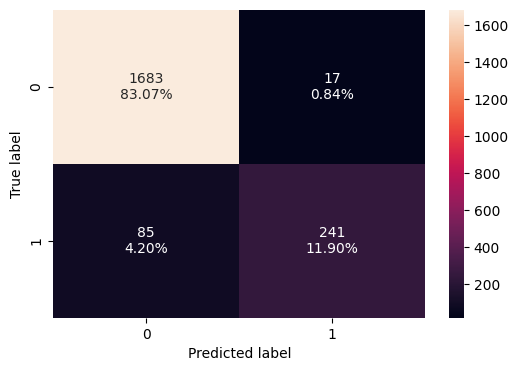

Confusion Matrix for gbm_og:


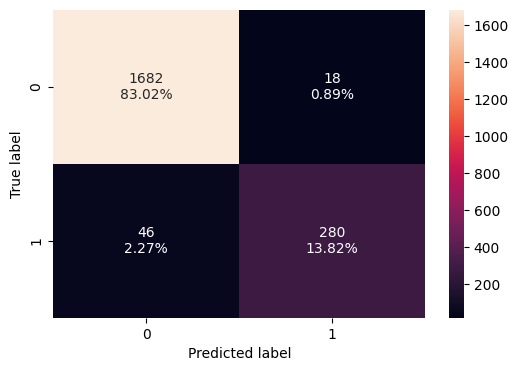

Confusion Matrix for ada_og:


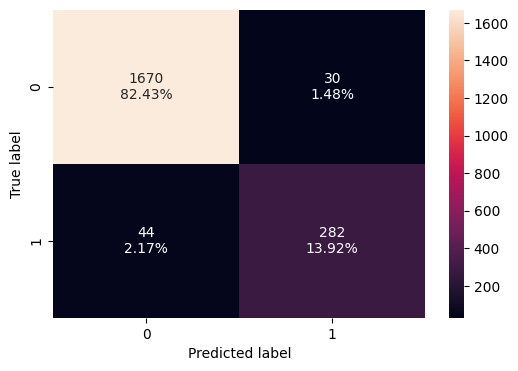

Confusion Matrix for dtree:


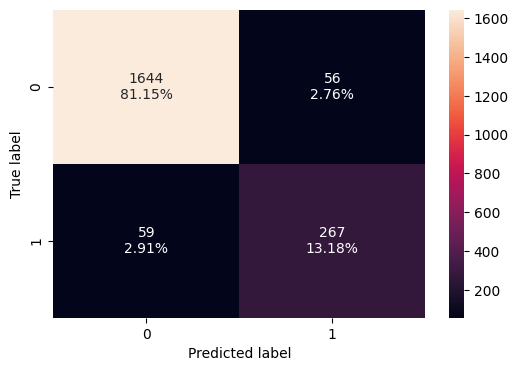

In [ ]:
# Looping through the models to visualize confusion matrices
for name, model in models:
    print(f"Confusion Matrix for {name}:")
    confusion_matrix_sklearn(model, X_val, y_val)
    plt.show()

As we clearly saw earlier, GBM and Adaboost have presented the best results, with 46 (2.27%) and 44 (2.17) FN, respectively. Furthermore, only 18 (0.89) and 30 (1.48) incorrectly classified existing customers as attrited customers.

Let's include even further visual representations of our results (of y_val and x_val):

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


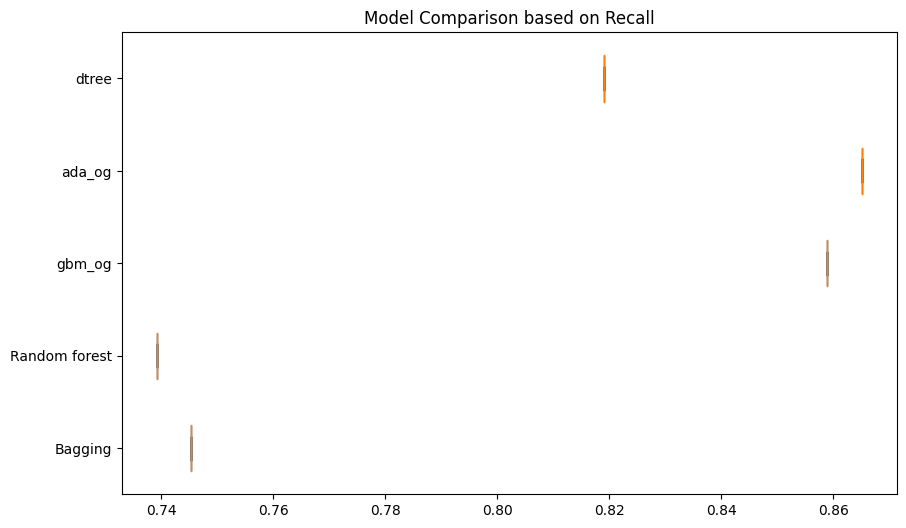

In [ ]:
# Extracting model names from the models list
model_names = [model[0] for model in models]

#Creating an empty list
recall_scores = []

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    recall_scores.append([scores_val])  # Converting to list of lists

# Creating boxplots for model comparison
plt.figure(figsize=(10, 6))
plt.boxplot(recall_scores, labels=model_names, vert=False, patch_artist=True)
plt.title("Model Comparison based on Recall")

plt.show()

The disparity in the validation set is evident. The difference is ranging between 74-87%, and that difference appears quite significant based on the above graph.

### Model Building with Oversampled data


Now that we have created 5 models with our original data, we should try both over and undersampling techniques to assist with the class ratio. Clearly, our minority class may be presented differently with the use of these techniques.SMOTE along with k_neighbors will help reduce the risk of overfitting and improves the generalization of the model.

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 



In [ ]:
model_names_oversample = ["Bagging_over", "Random_over", "GBM_over", "Adaboost_over", "dtree_over"]
models_oversample = [
    ("Bagging_over", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)),
    ("Random_over", RandomForestClassifier(random_state=1, class_weight='balanced')),
    ("GBM_over", GradientBoostingClassifier(random_state=1)),
    ("Adaboost_over", AdaBoostClassifier(random_state=1)),
    ("dtree_over", DecisionTreeClassifier(random_state=1, class_weight='balanced'))
]

# Training and evaluating performance for oversampled models
print("\nTraining Performance (Oversampled Models):\n")
for name, model in models_oversample:
    model.fit(X_train_over, y_train_over)
    y_train_pred = model.predict(X_train)
    recall_train = recall_score(y_train, y_train_pred)
    print("{} - Recall (Train): {:.4f}".format(name, recall_train))

print("\nValidation Performance (Oversampled Models):\n")
for name, model in models_oversample:
    y_val_pred = model.predict(X_val)
    recall_val = recall_score(y_val, y_val_pred)
    print("{} - Recall (Validation): {:.4f}".format(name, recall_val))


Training Performance (Oversampled Models):



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging_over - Recall (Train): 0.9959
Random_over - Recall (Train): 1.0000
GBM_over - Recall (Train): 0.9334
Adaboost_over - Recall (Train): 0.8781
dtree_over - Recall (Train): 1.0000

Validation Performance (Oversampled Models):

Bagging_over - Recall (Validation): 0.8681
Random_over - Recall (Validation): 0.8620
GBM_over - Recall (Validation): 0.8926
Adaboost_over - Recall (Validation): 0.8926
dtree_over - Recall (Validation): 0.8221


Unlike the original data, all valdiation scores are above 80%, suggesting improvement throughout. GBM and AdaBoost are showing identical validation scores at 0.8926 which is an improvement from the previous scores (0.8589 and 0.8650, respectively).

Confusion Matrix for Bagging_over:


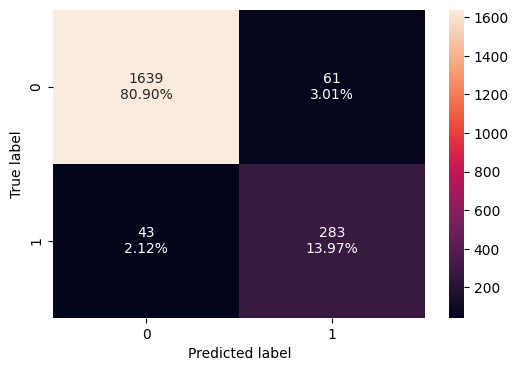

Confusion Matrix for Random_over:


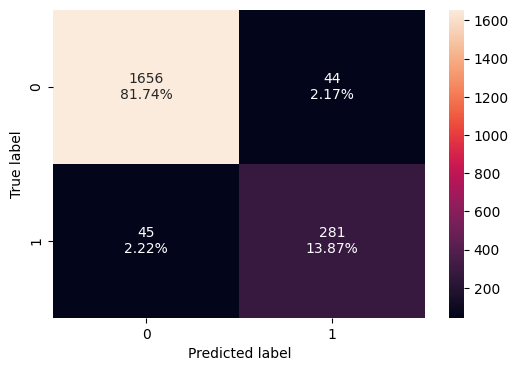

Confusion Matrix for GBM_over:


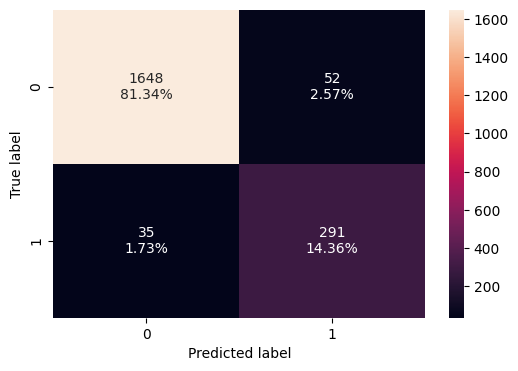

Confusion Matrix for Adaboost_over:


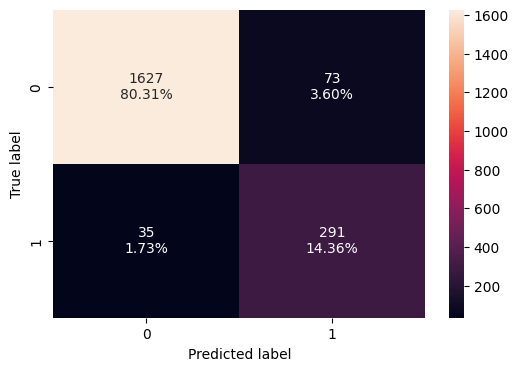

Confusion Matrix for dtree_over:


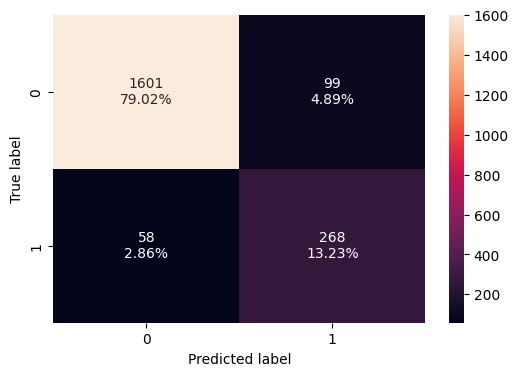

In [ ]:
# Looping through the models to visualize confusion matrices
for model_name, model in models_oversample:
    print(f"Confusion Matrix for {model_name}:")
    confusion_matrix_sklearn(model, X_val, y_val)
    plt.show()

Our FN have improved as seen in the above confusion matrices for our top two models. Previously, GBM gave us 46 (2.27%) FN, whereas after oversampling, only 35 (1.73%) were incorrectly labeled as existing customer when they were in fact attrited. Adaboost gave us 44 FN in the previous model, but is now giving us the same FN as GBM.

### Model Building with Undersampled data

In undersampling, we are reducing the number of instances in the majority class to balance the class distribution. Our main concern with undersampling is the loss of information.

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



Unfortunately this technique is reducing our rows down to 1952.

In [ ]:
model_names_under = ["Bagging_under", "Random forest_under", "GBM_under", "Adaboost_under", "dtree_under"]
models_under = [
    ("Bagging_under", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)),
    ("Random forest_under", RandomForestClassifier(random_state=1, class_weight='balanced')),
    ("GBM_under", GradientBoostingClassifier(random_state=1)),
    ("Adaboost_under", AdaBoostClassifier(random_state=1)),
    ("dtree_under", DecisionTreeClassifier(random_state=1, class_weight='balanced'))
]

# Training and evaluating performance
print("\nTraining Performance (Under-sampled Models):\n")
for name, model in models_under:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\nValidation Performance (Under-sampled Models):\n")
for name, model in models_under:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance (Under-sampled Models):

Bagging_under: 0.992827868852459


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random forest_under: 1.0
GBM_under: 0.9795081967213115
Adaboost_under: 0.9538934426229508
dtree_under: 1.0

Validation Performance (Under-sampled Models):

Bagging_under: 0.9294478527607362


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random forest_under: 0.9325153374233128
GBM_under: 0.9601226993865031
Adaboost_under: 0.9693251533742331
dtree_under: 0.911042944785276


While we see a high score in recall, we can not assume that these models will generalize well outside of this limited dataset.

Confusion Matrix for Bagging_under:


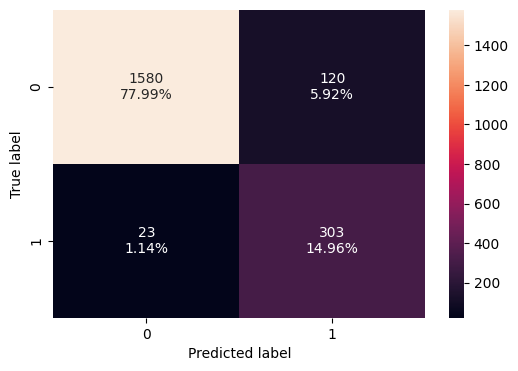

Confusion Matrix for Random forest_under:


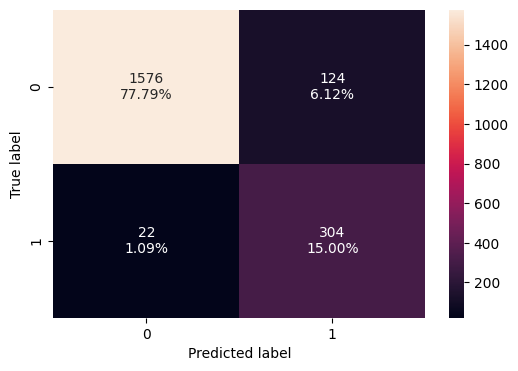

Confusion Matrix for GBM_under:


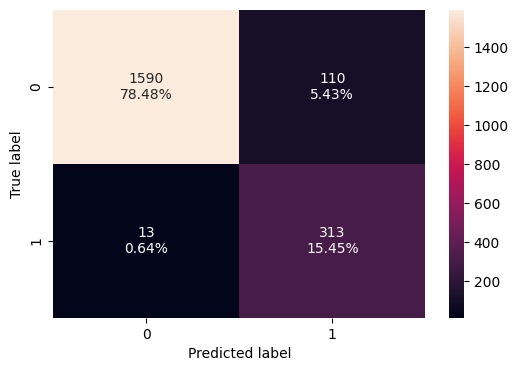

Confusion Matrix for Adaboost_under:


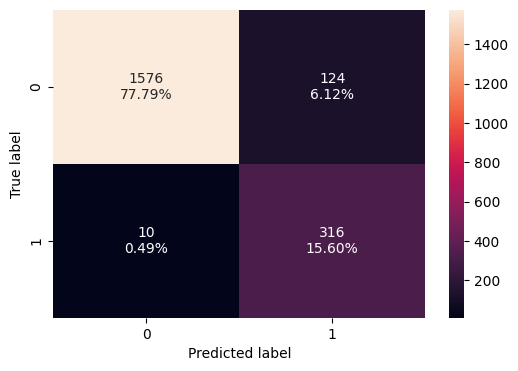

Confusion Matrix for dtree_under:


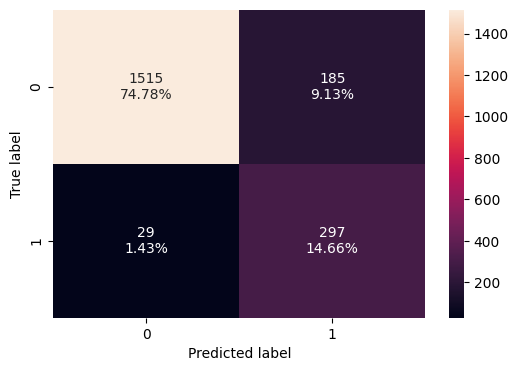

In [ ]:
# Looping through the models to visualize confusion matrices
for model_name, model in models_under:
    print(f"Confusion Matrix for {model_name}:")
    confusion_matrix_sklearn(model, X_val, y_val)
    plt.show()

Saving the best performer metrics for later use.

In [ ]:
# Calculating the performance metrics for Adaboost_under model
adaboost_under_val = model_performance_classification_sklearn(models_under[model_names_under.index("Adaboost_under")][1], X_val, y_val)
adaboost_under_accuracy = adaboost_under_val["Accuracy"].values[0]
adaboost_under_recall = adaboost_under_val["Recall"].values[0]
adaboost_under_precision = adaboost_under_val["Precision"].values[0]
adaboost_under_f1 = adaboost_under_val["F1"].values[0]

The main relevancy to the above metrics would be in regards to total amount of labeling incorrectly. Let's not forget that we are only working with 1952 observations and the total for the models are as follows:
Bagging= 143
Random Forest= 146
GBM= 123
Ada= 134
dtree=114

We can safetly say that we can't rely on a model with such limited information to generalize well on more unseen data. Random undersampling can lead to the loss of important data points in the majority class, potentially making the training data less representative of the true population.

### HyperparameterTuning

#### Sample Parameter Grids

#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
DT_tuned = DecisionTreeClassifier(random_state=1)

scorer = 'recall'

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=DT_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.7324542124542124:


In [ ]:
dtree_tuned1 = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_depth=5,
    max_leaf_nodes=15
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
# Calculating different metrics on validation set
dtree_grid_val = model_performance_classification_sklearn(dtree_tuned1, X_val, y_val)
print("Validation performance:")
dtree_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.92843,0.785276,0.773414,0.7793


In [ ]:
# defining Ada model
Ada_tuned = AdaBoostClassifier(random_state=1)

scorer = 'recall'
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Ada_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8606227106227108:


In [ ]:
Ada_tuned1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
)

# Fit the model on training data
Ada_tuned1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [ ]:
# Calculating different metrics on validation set
ada_grid_val = model_performance_classification_sklearn(Ada_tuned1, X_val, y_val)
print("Validation performance:")
ada_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.967917,0.871166,0.925081,0.897314


In [ ]:
# defining Gradient model
GBM_tuned = GradientBoostingClassifier(random_state=1)

scorer = 'recall'
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=GBM_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8472998430141289:


In [ ]:
base_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1), random_state=1)

GBM_tuned1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=base_ada
)

GBM_tuned1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GradientBoostingClassifier(init=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                                   random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# Calculating different metrics on validation set
GBM_grid_val = model_performance_classification_sklearn(GBM_tuned1, X_val, y_val)
print("Validation performance:")
GBM_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.938302,0.815951,0.803625,0.809741


In [ ]:
# defining Bagging model
Bagging_Tuned = BaggingClassifier(random_state=1)

scorer = 'recall'
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Bagging_Tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.9} with CV score=0.8134798534798534:


In [ ]:
bagging_tuned1 = BaggingClassifier(random_state=1)

# Scoring metric for evaluation
scorer = 'recall'

# Define the hyperparameter grid
param_grid = {
    "n_estimators":70,
    "max_samples": 0.8,
    "max_features": 0.9,
}
bagging_tuned1.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [ ]:
# Calculating different metrics on validation setbagging
bagging_grid_val = model_performance_classification_sklearn(bagging_tuned1, X_val, y_val)
print("Validation performance:")
bagging_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.955577,0.812883,0.901361,0.854839


In [ ]:
# defining Random Forest model
RF_tuned = RandomForestClassifier(random_state=1)

scorer = 'recall'

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=RF_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.738712715855573:


In [ ]:
from joblib.parallel import sqrt
rf_tuned1 = RandomForestClassifier(random_state=1)

# Scoring metric for evaluation
scorer = 'recall'

# Defining the hyperparameter grid
param_grid = {
    "n_estimators":250,
    "max_samples": 0.6,
    "max_features": sqrt,
    "min_samples_leaf": 1
}
rf_tuned1.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# Calculating different metrics on validation setbagging
rf_grid_val = model_performance_classification_sklearn(rf_tuned1, X_val, y_val)
print("Validation performance:")
rf_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.961994,0.819018,0.936842,0.873977


In [ ]:
# defining XGB model
XGB_tuned = XGBClassifier(random_state=1)

scorer = 'recall'
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=XGB_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.9282731554160126:


In [ ]:
xgb_tuned1 = XGBClassifier(random_state=1)

# Scoring metric for evaluation
scorer = 'recall'

# Defining the hyperparameter grid
param_grid = {
    "n_estimators":250,
    "subsample": 0.7,
    "scale_pos_weight":10,
    "learning_rate":0.2,
    "max_samples": 0.6,
    "gamma":3
}
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgb_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.965943,0.877301,0.907937,0.892356


In [ ]:
# Defining a list of tuned models
tuned_models = [
    XGBClassifier(**xgb_tuned1.get_params()),
    rf_tuned1,
    GBM_tuned1,
    Ada_tuned1,
    bagging_tuned1,
    dtree_tuned1
]

# Training and evaluating performance
print("Training Performance:")
for name, model in zip(["XGBoost", "Random Forest", "Gradient Boosting", "AdaBoost", "Bagging", "Decision Tree"], tuned_models):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    recall = recall_score(y_train, y_train_pred)
    print(f"{name} Recall: {recall:.4f}")

print("\nValidation Performance:")
for name, model in zip(["XGBoost", "Random Forest", "Gradient Boosting", "AdaBoost", "Bagging", "Decision Tree"], tuned_models):
    y_val_pred = model.predict(X_val)
    recall = recall_score(y_val, y_val_pred)
    print(f"{name} Recall: {recall:.4f}")

Training Performance:
XGBoost Recall: 1.0000
Random Forest Recall: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Gradient Boosting Recall: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Recall: 0.9744
Bagging Recall: 0.9846
Decision Tree Recall: 0.8053

Validation Performance:
XGBoost Recall: 0.8773
Random Forest Recall: 0.8190
Gradient Boosting Recall: 0.8160
AdaBoost Recall: 0.8712
Bagging Recall: 0.8129
Decision Tree Recall: 0.7853


**Our best hypertuned model with original data is XGBoost with 87% accuracy on recall, followed by Adaboost which sits at 87% accuracy on recall.**

#### Sample tuning method for Decision tree with oversampled data

In [ ]:
rf_tuned_over = RandomForestClassifier(random_state=1)

# Scoring metric for evaluation
scorer = 'recall'

# Defining the hyperparameter grid
param_grid = {
    "n_estimators":250,
    "max_samples": 0.6,
    "max_features": sqrt,
    "min_samples_leaf": 1
}
rf_tuned_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

In [ ]:
# Calculating different metrics on validation setbagging
rf_grid_val_over = model_performance_classification_sklearn(rf_tuned_over, X_val, y_val)
print("Validation performance:")
rf_grid_val_over

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.956071,0.861963,0.864615,0.863287


In [ ]:
bagging_tuned_over = BaggingClassifier(random_state=1)

# Scoring metric for evaluation
scorer = 'recall'

# Defining the hyperparameter grid
param_grid = {
    "n_estimators":70,
    "max_samples": 0.8,
    "max_features": 0.9,
}
bagging_tuned_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

In [ ]:
bagging_grid_val_over = model_performance_classification_sklearn(bagging_tuned_over, X_val, y_val)
print("Validation performance:")
bagging_grid_val_over

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.948667,0.868098,0.822674,0.844776


In [ ]:
xgb_tuned_over = XGBClassifier(random_state=1)

# Scoring metric for evaluation
scorer = 'recall'
param_grid = {
    "n_estimators":250,
    "subsample": 0.7,
    "scale_pos_weight":10,
    "learning_rate":0.2,
    "max_samples": 0.6,
    "gamma":3
}
xgb_tuned_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_grid_val_over = model_performance_classification_sklearn(xgb_tuned_over, X_val, y_val)
print("Validation performance:")
xgb_grid_val_over

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.968411,0.91411,0.892216,0.90303


In [ ]:
base_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1), random_state=1)

gbm_tuned_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=base_ada
)

gbm_tuned_over.fit(X_train_over, y_train_over)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GradientBoostingClassifier(init=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                                   random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
gbm_grid_val_over = model_performance_classification_sklearn(gbm_tuned_over, X_val, y_val)
print("Validation performance:")
gbm_grid_val_over

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.929911,0.849693,0.748649,0.795977


In [ ]:
ada_tuned_over = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
)

# Fit the model on training data
ada_tuned_over.fit(X_train_over, y_train_over)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [ ]:
ada_grid_val_over = model_performance_classification_sklearn(ada_tuned_over, X_val, y_val)
print("Validation performance:")
ada_grid_val_over

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.965449,0.90184,0.885542,0.893617


In [ ]:
dtree_tuned_over = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_depth=5,
    max_leaf_nodes=15
)

# Fit the model on training data
dtree_tuned_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
dtree_grid_val_over = model_performance_classification_sklearn(dtree_tuned_over, X_val, y_val)
print("Validation performance:")
dtree_grid_val_over

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.906713,0.91411,0.649237,0.759236


In [ ]:
tuned_models_over = [
    XGBClassifier(**xgb_tuned_over.get_params()),
    dtree_tuned_over,
    gbm_tuned_over,
    ada_tuned_over,
    bagging_tuned_over,
    rf_tuned_over
]

# Training and evaluating performance
print("Training Performance:")
for name, model in zip(["XGBoost", "Decision Tree", "Gradient Boosting", "AdaBoost", "Bagging", "Random Forest"], tuned_models_over):
    model.fit(X_train_over, y_train_over)
    y_train_pred = model.predict(X_train_over)
    recall = recall_score(y_train_over, y_train_pred)
    print(f"{name} Recall: {recall:.4f}")

print("\nValidation Performance:")
for name, model in zip(["XGBoost", "Decision Tree", "Gradient Boosting", "AdaBoost", "Bagging", "Random Forest"], tuned_models_over):
    y_val_pred = model.predict(X_val)
    recall = recall_score(y_val, y_val_pred)
    print(f"{name} Recall: {recall:.4f}")

Training Performance:
XGBoost Recall: 1.0000
Decision Tree Recall: 0.9245


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Gradient Boosting Recall: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Recall: 0.9937
Bagging Recall: 0.9982
Random Forest Recall: 1.0000

Validation Performance:
XGBoost Recall: 0.9141
Decision Tree Recall: 0.9141
Gradient Boosting Recall: 0.8497
AdaBoost Recall: 0.9018
Bagging Recall: 0.8681
Random Forest Recall: 0.8620


**Our best performers for the oversampled data are the XGBoost and Decision Tree models, both sharing the same score of 91.41% accuracy in recall score. **

#### Sample tuning method for Decision tree with undersampled data

In [ ]:
rf_tuned_under = RandomForestClassifier(random_state=1)

# Scoring metric for evaluation
scorer = 'recall'

# Defining the hyperparameter grid
param_grid = {
    "n_estimators":250,
    "max_samples": 0.6,
    "max_features": sqrt,
    "min_samples_leaf": 1
}
rf_tuned_under.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

In [ ]:
dtree_tuned_under = DecisionTreeClassifier(
    random_state=1,
    min_samples_leaf=7,
    min_impurity_decrease=0.0001,
    max_depth=5,
    max_leaf_nodes=15
)

# Fit the model on training data
dtree_tuned_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
ada_tuned_under = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
)

# Fit the model on training data
ada_tuned_under.fit(X_train_un, y_train_un)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [ ]:
ada_grid_val_under = model_performance_classification_sklearn(ada_tuned_under, X_val, y_val)
print("Validation performance:")
ada_grid_val_under

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.935834,0.957055,0.728972,0.827586


In [ ]:
xgb_tuned_under = XGBClassifier(random_state=1)

# Scoring metric for evaluation
scorer = 'recall'
param_grid = {
    "n_estimators":250,
    "subsample": 0.7,
    "scale_pos_weight":10,
    "learning_rate":0.2,
    "max_samples": 0.6,
    "gamma":3
}
xgb_tuned_under.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_grid_val_under = model_performance_classification_sklearn(xgb_tuned_under, X_val, y_val)
print("Validation performance:")
xgb_grid_val_under

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.942744,0.957055,0.753623,0.843243


In [ ]:
bagging_tuned_under = BaggingClassifier(random_state=1)

# Scoring metric for evaluation
scorer = 'recall'

# Defining the hyperparameter grid
param_grid = {
    "n_estimators":70,
    "max_samples": 0.8,
    "max_features": 0.9,
}
bagging_tuned_under.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

In [ ]:
base_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1), random_state=1)

gbm_tuned_under = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=base_ada
)

gbm_tuned_under.fit(X_train_un, y_train_un)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GradientBoostingClassifier(init=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                                   random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
tuned_models_under = [
    XGBClassifier(**xgb_tuned_under.get_params()),
    dtree_tuned_under,
    gbm_tuned_under,
    ada_tuned_under,
    bagging_tuned_under,
    rf_tuned_under
]

# Training and evaluating performance
print("Training Performance:")
for name, model in zip(["XGBoost", "Decision Tree", "Gradient Boosting", "AdaBoost", "Bagging", "Random Forest"], tuned_models_under):
    model.fit(X_train_un, y_train_un)
    y_train_pred = model.predict(X_train_un)
    recall = recall_score(y_train_un, y_train_pred)
    print(f"{name} Recall: {recall:.4f}")

print("\nValidation Performance:")
for name, model in zip(["XGBoost", "Decision Tree", "Gradient Boosting", "AdaBoost", "Bagging", "Random Forest"], tuned_models_under):
    y_val_pred = model.predict(X_val)
    recall = recall_score(y_val, y_val_pred)
    print(f"{name} Recall: {recall:.4f}")

Training Performance:
XGBoost Recall: 1.0000
Decision Tree Recall: 0.9395


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Gradient Boosting Recall: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Recall: 1.0000
Bagging Recall: 0.9928
Random Forest Recall: 1.0000

Validation Performance:
XGBoost Recall: 0.9571
Decision Tree Recall: 0.9202
Gradient Boosting Recall: 0.8957
AdaBoost Recall: 0.9571
Bagging Recall: 0.9294
Random Forest Recall: 0.9325


The undersampling technique yields intriguing results, particularly in the outcomes it produces. As demonstrated above, XGBoost stands out with exceptional performance on the validation set, and many other models exhibit promising results as well. Is this attributable to a scarcity of data, or can our models genuinely exhibit strong generalization capabilities? To discern the truth, let's conduct a model comparison and assess their performance using the remaining test data.

## Model Comparison and Final Model Selection

In [ ]:
model_comp_val = pd.concat(
    [
        adaboost_under_val.T,
        ada_grid_val_under.T,
        xgb_grid_val_over.T,
        xgb_grid_val_under.T
    ],
    axis=1,
)
model_comp_val.columns = [
    "Adaboost Undersampling",
    "Adaboost Tuned Undersampling",
    "XBG Boost Oversampling",
    "XGB Boost Undersampling"
]
print("Test set performance comparison:")
model_comp_val

Test set performance comparison:


,Adaboost Undersampling,Adaboost Tuned Undersampling,XBG Boost Oversampling,XGB Boost Undersampling
Accuracy,0.933860,0.935834,0.968411,0.942744
Recall,0.969325,0.957055,0.914110,0.957055
Precision,0.718182,0.728972,0.892216,0.753623
F1,0.825065,0.827586,0.903030,0.843243


Just as we predicted earlier, the undersampled models are showing us promising results. Let's see how the top 2 models perform on the test set.

### Test set final performance

In [ ]:
# Calculate the test set performance for the Adaboost_under model
best_model_test_Ada = model_performance_classification_sklearn(models_under[model_names_under.index("Adaboost_under")][1], X_test, y_test)

# Display the test set performance
print("Test Set Performance for Adaboost Under:")
print(best_model_test_Ada)

Test Set Performance for Adaboost Under:
   Accuracy    Recall  Precision        F1
0   0.92695  0.956923   0.698876  0.807792


In [ ]:
# Let's check the performance on test set
best_model_test_xgb = model_performance_classification_sklearn(xgb_tuned_over, X_test, y_test)
print("Test Set Performance for XGB Over:")
best_model_test_xgb

Test Set Performance for XGB Over:


,Accuracy,Recall,Precision,F1
0,0.97384,0.944615,0.897661,0.92054


From the above comparison of our top 2 models, we can conclude that the xgb_tuned_over was our top performer in the test set.

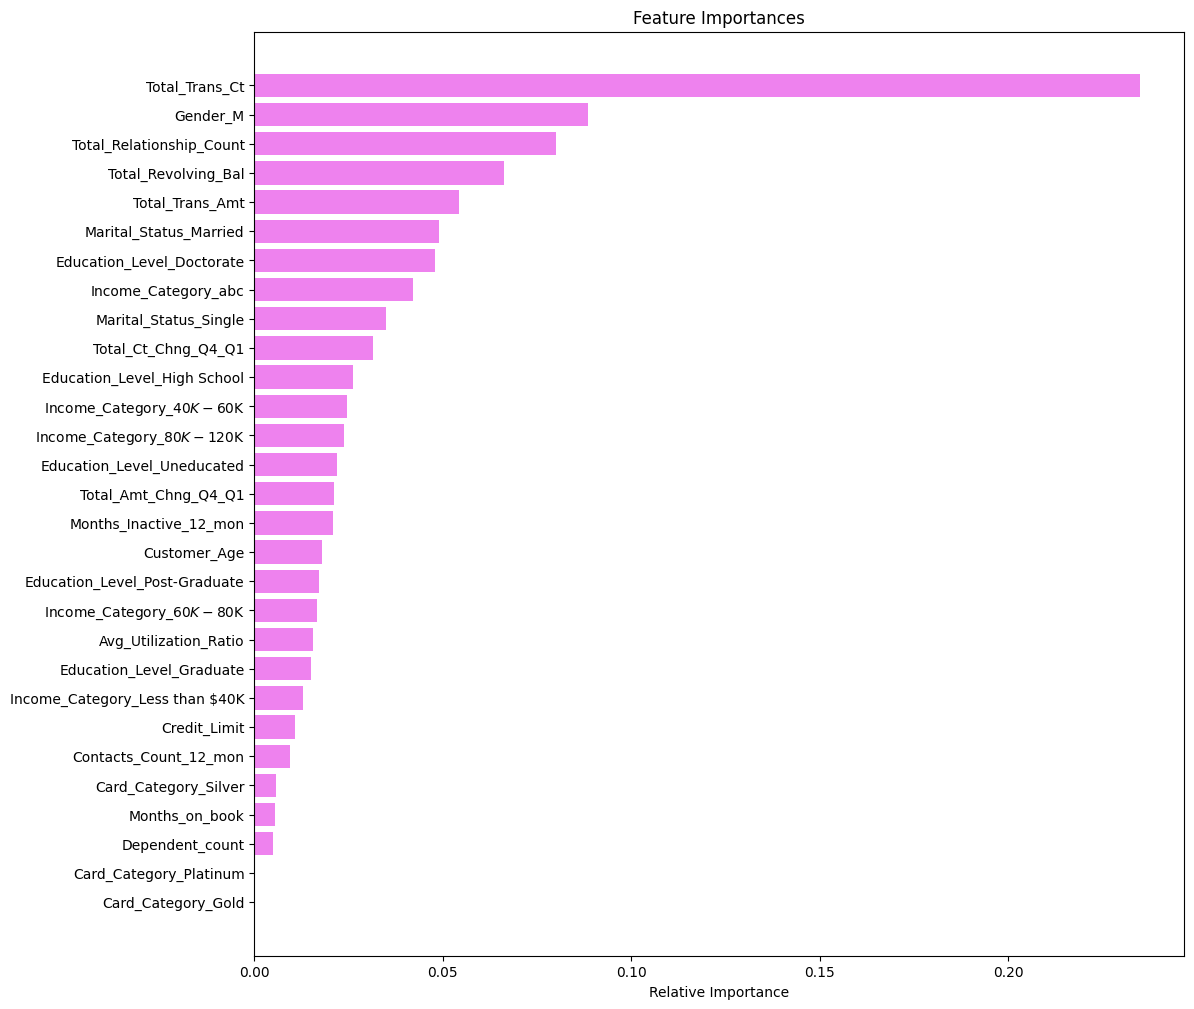

In [ ]:
feature_names = X_val.columns
importances = xgb_tuned_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

This insight is showing us a clear level of importance for our best performing model. It is worth noting that Income_Category_abc is showing a higher level of importance than the the other income levels, suggesting that we need to understand what the abc category means to strategize accordingly.

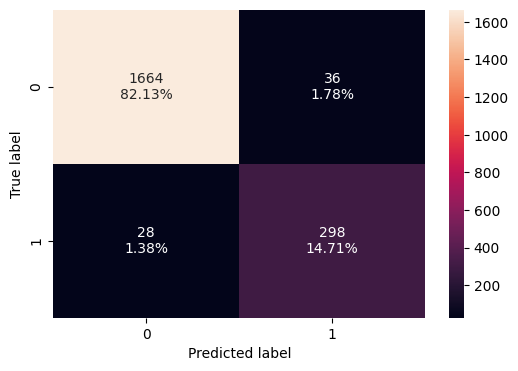

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_over, X_val, y_val)

The validation set's confusion matrix reveals that our chosen model identified 28 false negatives (FN). In contrast, it generated 36 false positives (FP), which holds less significance in this context. Successfully identifying 298 churned customers implies that we've developed an effective model to support Thera Bank in achieving its objective.

# Business Insights and Conclusions

The Thera bank aims to minimize the attrition of its credit card customers and, in this context, leverages data science and classification models to identify customers likely to leave their credit card services. The objective is to improve services, reduce attrition, and, consequently, boost revenue.

Key Findings:

Best Performing Model: The XGBoost classifier with specific hyperparameters (xgb_tuned_over) emerges as the best-performing model. It achieves high accuracy (97.38%) and recall (94.46%) on the test data, highlighting its ability to correctly identify customers at risk of attrition.

Model Evaluation Metrics: The recall score (sensitivity) is of utmost importance in this context. It represents the model's capability to identify customers likely to attrite correctly. A high recall is crucial to avoid false negatives, which can result in the loss of valuable customers. In the best model (xgb_tuned_over), the recall is 94.46%, indicating its effectiveness in identifying potential attrition cases.

Feature Importance: The top features contributing to the best model's performance are Total_Trans_Ct, Gender_M (Male), Total_Relationship_Count, Total_Revolving Balance, Total_Trans_Amt, Marital_status-Married, Education_Level_Doctorate. These features provide insights into the characteristics of customers at risk of attrition, aiding the bank in targeted interventions and improvements.

Reason for Not Using Undersampling: Undersampling techniques can lead to a loss of important data points, making the training data less representative of the true population. In this context, using an undersampled model might not provide sufficient information for accurate predictions, and it may not generalize well on unseen data. Therefore, oversampling techniques, such as SMOTE, were favored.

Recommendations:

The bank should focus on customers with specific attributes, such as lower transaction activity and those with prolonged inactivity.
Implement targeted retention strategies for customers at risk of attrition based on model predictions. Research competition and audit the credit card products avaliable by Thera Bank to ensure it has a competitive advantage. In addition to this, focus on new market segments, such as higher income categories, to offer more lucrative credit card products, such as Premium.  
Continuously monitor and analyze customer data to identify changing patterns and behaviors.
In conclusion, the implementation of a robust classification model, such as xgb_tuned_over, allows the Thera bank to proactively identify customers likely to leave their credit card services. This enables the bank to take strategic actions to improve services, retain customers, and maximize its credit card revenue.


In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/Project3_EmmaCampodonico_FullCode_Final.ipynb

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab_Notebooks/Project3_EmmaCampodonico_FullCode_Final.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***